# Loading and preliminary exploration of MOMI data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import missingno as msno 
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [2]:
system = 'windows'

In [3]:
# Prenatal Data
parent = os.path.dirname(os.getcwd())
if system == 'windows':
    dataPath = os.path.join(parent, r"Data\MOMI\Final_Prenatal_DeIdentified.xlsx")
    prenatal = pd.read_excel('file:\\' + dataPath)
else:
    dataPath = os.path.join(parent, r"Data/MOMI/Final_Prenatal_DeIdentified.xlsx")
    prenatal = pd.read_excel('file://' + dataPath)

In [4]:
# MOMI Data
parent = os.path.dirname(os.getcwd())
if system == 'windows':
    dataPath = os.path.join(parent, r"Data\MOMI\Final_MOMI_DeIdentified_Update_39Mar2021.xlsx")
    momi = pd.read_excel('file:\\' + dataPath)
else:
    dataPath = os.path.join(parent, r"Data/MOMI/Final_MOMI_DeIdentified_Update_39Mar2021.xlsx")
    momi = pd.read_excel('file://' + dataPath)

In [5]:
# Ultrasound Data
parent = os.path.dirname(os.getcwd())
if system == 'windows':
    dataPath = os.path.join(parent, r"Data\MOMI\Final_Ultrasound_DeIdentified.xlsx")
    ultrasound = pd.read_excel('file:\\' + dataPath)
else: 
    dataPath = os.path.join(parent, r"Data/MOMI/Final_Ultrasound_DeIdentified.xlsx")
    ultrasound = pd.read_excel('file://' + dataPath)

In [25]:
momi.shape

(234965, 98)

In [26]:
momi.columns

Index(['MOMI_ID', 'Delivery_Number_Per_Mother', 'DeliveryYear',
       'Has_Prenatal_Data', 'Has_Ultrasound_PlacLoc', 'DMOMAGE',
       'FatherAge_State', 'MomEducation_State', 'DadEducation_State',
       'NumCig3MoPriorToPreg_State', 'NumCigFirstTri_State',
       'NumCigSecondTri_State', 'NumCigThirdTri_State', 'Smoke_a', 'Smoke_b',
       'Alcohol_a', 'Alcohol_b', 'Race', 'Ethnicity', 'DFC', 'DELWKSGT',
       'MHXGRAV', 'MHXPARA', 'MHXABORT', 'PRIMIP', 'DMOMHGT', 'MOBRPWT',
       'MOBADMWT', 'FOBLABHR', 'FOBROMHR', 'CSREPEAT', 'FDELTYPE', 'MMULGSTD',
       'SINGLETON', 'FOBDEATH', 'MCNSMUSC', 'MCOLVASC', 'MCVDANAT', 'MCVDHTN',
       'MOBHTN', 'Gest_HTN', 'Mild_PE', 'Severe_PE', 'SIPE', 'Unspecified_HTN',
       'MDELCOMP', 'MDEPRESS', 'MENDDIAB', 'MENDTHY', 'MGIHYPER', 'MGILGBP',
       'MGUINFER', 'MGURENAL', 'MHEARTOPER', 'MHEMANEM', 'MHEMHGB', 'MHEMPLT',
       'MHEMTRAN', 'MIDBV', 'MIDCHLAM', 'MIDCONDY', 'MIDGBS', 'MIDGC',
       'MIDHEPB', 'MIDHSV', 'MIDTB', 'MIDTRICH', 'M

In [5]:
for c in momi.columns:
    print(f'----{c}----')
    print(momi[c].value_counts().sort_index())
    print('')

----MOMI_ID----
11111167991974    2
11111281991979    3
11111351991995    1
11111891991995    1
11112391991988    2
                 ..
99997946991994    3
99998311991983    2
99998655991969    2
99999283991981    1
99999371991992    1
Name: MOMI_ID, Length: 153987, dtype: int64

----Delivery_Number_Per_Mother----
1     157973
2      56712
3      15101
4       3749
5        972
6        306
7        102
8         37
9          9
10         2
11         1
12         1
Name: Delivery_Number_Per_Mother, dtype: int64

----DeliveryYear----
1995     8409
1996     8429
1997     8035
1998     7324
1999     7089
2000     7964
2001     8183
2002     7996
2003     8028
2004     8341
2005     8995
2006     9066
2007     9565
2008     9784
2009     9986
2010     9958
2011    10329
2012    10663
2013    10960
2014    10835
2015     9886
2016     9150
2017     8826
2018     8562
2019     9299
2020     9303
Name: DeliveryYear, dtype: int64

----Has_Prenatal_Data----
0    188301
1     46664
Name: Has_P

100.0     1
105.0     2
108.0     1
113.0     1
115.0     1
         ..
5946.0    1
6118.0    1
6788.0    1
7020.0    1
9222.0    1
Name: IDEMBWT, Length: 4850, dtype: int64

----IGROWTH----
0.0    186954
1.0     24160
2.0     20360
Name: IGROWTH, dtype: int64

----ICNSANAT----
0.0    231746
1.0        10
2.0        12
3.0       441
4.0       160
5.0       116
8.0       183
9.0       469
Name: ICNSANAT, dtype: int64

----IIDSYPH----
0.0    232198
1.0        13
Name: IIDSYPH, dtype: int64

----IIDUTI----
0.0    232153
1.0        58
Name: IIDUTI, dtype: int64



In [17]:
len(momi['MOMI_ID'].unique())

153987

So there are 153,987 unique moms in the dataset

In [27]:
momi.head()

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,Has_Prenatal_Data,Has_Ultrasound_PlacLoc,DMOMAGE,FatherAge_State,MomEducation_State,DadEducation_State,NumCig3MoPriorToPreg_State,...,History_PTB,Hist_Trophoblastic_Disease_2,Infant_Number,InfSex,NICULOS,IDEMBWT,IGROWTH,ICNSANAT,IIDSYPH,IIDUTI
0,11111167991974,1,1996,0,0,22.0,NaN,NaN,NaN,NaN,...,0,0,1,M,0.0,1200.0,1.0,0.0,0.0,0.0
1,11111167991974,2,1998,0,0,24.0,NaN,NaN,NaN,NaN,...,0,0,2,F,0.0,2988.0,0.0,0.0,0.0,0.0
2,11111281991979,1,2007,0,0,28.0,NaN,NaN,NaN,NaN,...,0,0,1,F,0.0,3560.0,0.0,0.0,0.0,0.0
3,11111281991979,2,2009,0,0,30.0,NaN,NaN,NaN,NaN,...,0,0,2,F,0.0,3355.0,0.0,0.0,0.0,0.0
4,11111281991979,3,2011,0,0,32.0,34.0,Bachelor's degree,Master's degree,0.0,...,0,0,3,M,0.0,4025.0,0.0,0.0,0.0,0.0


In [6]:
prenatal.shape

(464201, 10)

In [18]:
prenatal['MOMI_ID'].unique().shape

(43969,)

43969 unique mothers in the Prental dataset

In [14]:
prenatal.groupby(['MOMI_ID', 'Delivery_Number_Per_Mother']).size()

MOMI_ID         Delivery_Number_Per_Mother
11111351991995  1                              9
11112391991988  2                              9
11114577991983  3                              8
11115312991979  1                              3
11115952991983  1                             13
                                              ..
99997946991994  2                             10
                3                              7
99998311991983  1                              1
                2                             11
99999283991981  1                              9
Length: 53080, dtype: int64

53,080 unique Mom/baby pairs

In [6]:
prenatal.head()

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,DELWKSGT,MMULGSTD,SINGLETON,PNV_Total_Number,PNV_GestAge,PNV_BP,PNV_Weight_Oz
0,98174825991981,3,2018,36.857143,10,1,7.0,8.285714,102/70,3024.0
1,98174825991981,3,2018,36.857143,10,1,7.0,9.714286,120/60,3056.0
2,98174825991981,3,2018,36.857143,10,1,7.0,14.857143,110/66,3184.0
3,98174825991981,3,2018,36.857143,10,1,7.0,19.857143,110/70,3289.0
4,98174825991981,3,2018,36.857143,10,1,7.0,25.857143,110/70,3395.0


In [5]:
prenatal.columns

Index(['MOMI_ID', 'Delivery_Number_Per_Mother', 'DeliveryYear', 'DELWKSGT',
       'MMULGSTD', 'SINGLETON', 'PNV_Total_Number', 'PNV_GestAge', 'PNV_BP',
       'PNV_Weight_Oz'],
      dtype='object')

In [6]:
for c in prenatal.columns:
    print(f'----{c}----')
    print(prenatal[c].value_counts())
    print('')

----MOMI_ID----
69829958991994    52
81587199991987    51
55736198991994    50
31755233991991    50
98866858991992    49
                  ..
76482981991987     1
47292967991988     1
74355553991982     1
25637813991993     1
37897869991987     1
Name: MOMI_ID, Length: 43969, dtype: int64

----Delivery_Number_Per_Mother----
1     276727
2     130771
3      40955
4      11165
5       3053
6       1027
7        366
8         97
9         26
10        10
12         3
11         1
Name: Delivery_Number_Per_Mother, dtype: int64

----DeliveryYear----
2019    84006
2016    80024
2020    78643
2018    77227
2017    75062
2015    69239
Name: DeliveryYear, dtype: int64

----DELWKSGT----
39.000000    33654
39.142857    19730
40.000000    17320
39.285714    15354
39.857143    15219
             ...  
16.428571        1
43.285714        1
39.142857        1
43.142857        1
17.571429        1
Name: DELWKSGT, Length: 313, dtype: int64

----MMULGSTD----
10    453405
2       8915
1       1476
5     

In [10]:
ultrasound.shape

(221277, 17)

In [9]:
ultrasound.head()

,MOMI_ID,DeliveryYear,Delivery_Number_Per_Mother,DELWKSGT,MMULGSTD,SINGLETON,USExamCategory,USExamType,USGestAge,USGestAgeType,FetusNumber,USPlacLoc_1,USPlacLoc_2,USPlacLoc_3,USPlacLoc_4,USPlacLoc_5,USPlacLoc_6
0,75721299991966,2011,1,39.0,10,1,Obstetric,Complete,22.1,LMP,1,1,NaN,NaN,NaN,NaN,NaN
1,75721299991966,2011,1,39.0,10,1,Obstetric,FollowUp,30.3,LMP,1,1,NaN,NaN,NaN,NaN,NaN
2,81155213991973,2011,1,37.0,10,1,Obstetric,FirstTrimester,9.7,LMP,1,8,NaN,NaN,NaN,NaN,NaN
3,81155213991973,2011,1,37.0,10,1,Obstetric,FirstTrimester,13.1,LMP,1,4,5.0,NaN,NaN,NaN,NaN
4,81155213991973,2011,1,37.0,10,1,Obstetric,Complete,19.4,LMP,1,1,NaN,NaN,NaN,NaN,NaN


In [7]:
ultrasound.columns

Index(['MOMI_ID', 'DeliveryYear', 'Delivery_Number_Per_Mother', 'DELWKSGT',
       'MMULGSTD', 'SINGLETON', 'USExamCategory', 'USExamType', 'USGestAge',
       'USGestAgeType', 'FetusNumber', 'USPlacLoc_1', 'USPlacLoc_2',
       'USPlacLoc_3', 'USPlacLoc_4', 'USPlacLoc_5', 'USPlacLoc_6'],
      dtype='object')

In [8]:
for c in ultrasound.columns:
    print(f'----{c}----')
    print(ultrasound[c].value_counts())
    print('')

----MOMI_ID----
35243577991982    140
72461946991978     60
31676118991982     60
74244418991986     59
88364615991995     56
                 ... 
99127148991980      1
64494431991989      1
48474724991979      1
72632552991983      1
22948915991988      1
Name: MOMI_ID, Length: 63452, dtype: int64

----DeliveryYear----
2014    29028
2013    28066
2019    26950
2012    24421
2018    22140
2020    21003
2017    19179
2015    17310
2016    16580
2011    16429
2010      171
Name: DeliveryYear, dtype: int64

----Delivery_Number_Per_Mother----
1    178369
2     36459
3      5196
4       948
5       230
6        53
7        14
8         8
Name: Delivery_Number_Per_Mother, dtype: int64

----DELWKSGT----
39.000000    35540
40.000000    19617
38.000000    16349
37.000000    15691
41.000000    11185
             ...  
20.285714        1
17.571429        1
17.142857        1
44.000000        1
43.142857        1
Name: DELWKSGT, Length: 305, dtype: int64

----MMULGSTD----
10    196109
2      2199

In [ ]:
ultrasound.rename(columns={})

# Missing Values

## MOMI Missing

In [6]:
# Fix MOMI missing values to np.NaN
momi['MIDBV'] = np.where(momi['MIDBV'] == 99, np.NaN, momi['MIDBV'])
momi['MIDCHLAM'] = np.where(momi['MIDCHLAM'] == 99, np.NaN, momi['MIDCHLAM'])
momi['MIDCONDY'] = np.where(momi['MIDCONDY'] == 99, np.NaN, momi['MIDCONDY'])
momi['MIDGC'] = np.where(momi['MIDGC'] == 99, np.NaN, momi['MIDGC'])
momi['MIDHEPB'] = np.where(momi['MIDHEPB'] == 99, np.NaN, momi['MIDHEPB'])
momi['MIDTRICH'] = np.where(momi['MIDTRICH'] == 99, np.NaN, momi['MIDTRICH'])
momi['MIDGBS'] = np.where(momi['MIDGBS'] == 99, np.NaN, momi['MIDGBS'])
momi['MomEducation_State'] = np.where(momi['MomEducation_State'] == 'Unknown', np.NaN, momi['MomEducation_State'])
momi['DadEducation_State'] = np.where(momi['DadEducation_State'] == 'Unknown', np.NaN, momi['DadEducation_State'])
momi['Smoke_b'] = np.where(momi['Smoke_b'] == 'Unknown (unable to assess)', np.NaN, momi['Smoke_b'])
momi['Race'] = np.where(momi['Race'].isin(['9', 'A']), np.NaN, momi['Race'])
momi['Ethnicity'] = np.where(momi['Ethnicity'].isin(['UNSPECIFIED']), np.NaN, momi['Ethnicity'])
momi['InfSex'] = np.where(momi['InfSex'] == 'U', np.NaN, momi['InfSex'])
momi['InfSex'] = np.where(momi['InfSex'] == 'f', 'F', momi['InfSex'])

In [ ]:
msno.matrix(momi)

<AxesSubplot:>

## Missingness Heatmap
A value near -1 means if one variable appears then the other variable is very likely to be missing.

A value near 0 means there is no dependence between the occurrence of missing values of two variables.

A value near 1 means if one variable appears then the other variable is very likely to be present.

<AxesSubplot:>

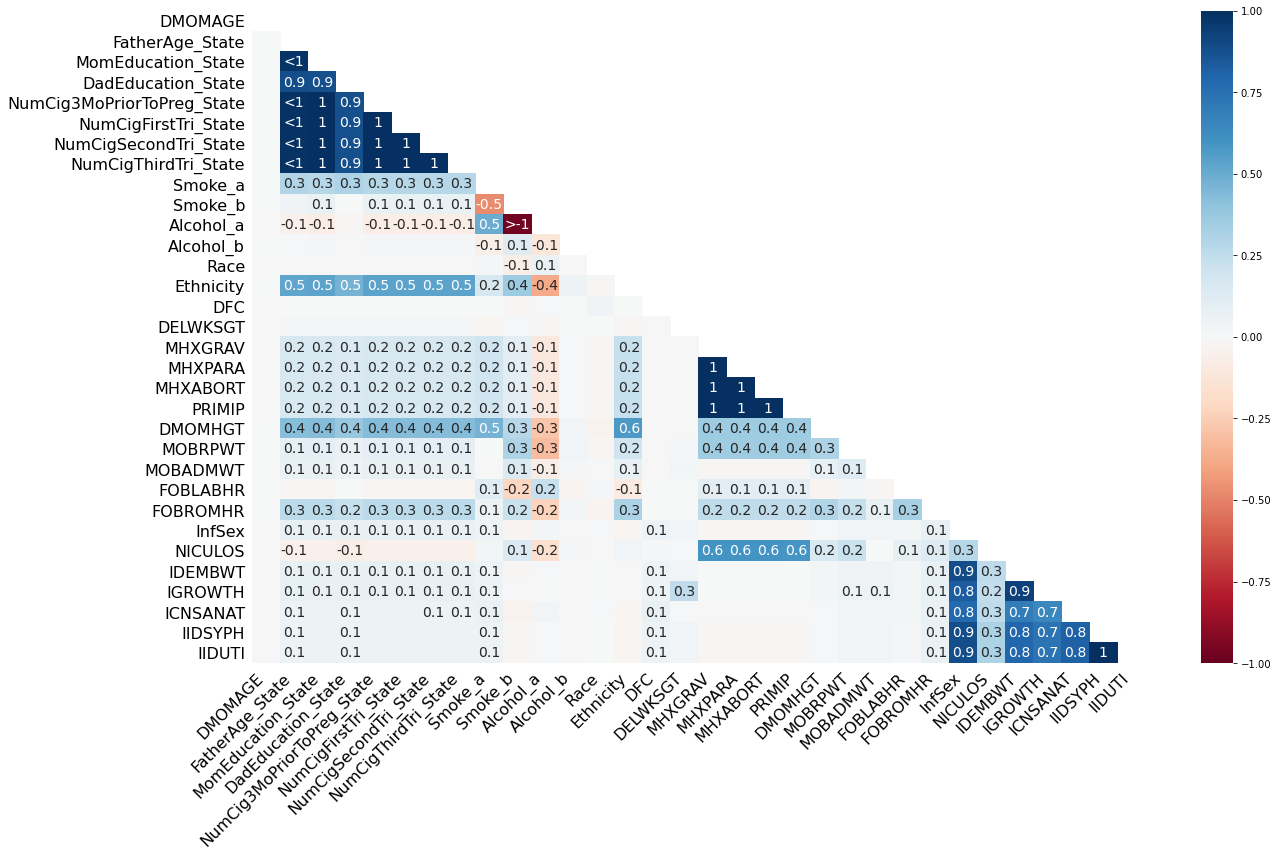

In [245]:
msno.heatmap(momi)

In [70]:
pd.set_option('display.max_rows', None)
momi.isnull().sum()/len(momi)*100

MOMI_ID                             0.000000
Delivery_Number_Per_Mother          0.000000
DeliveryYear                        0.000000
Has_Prenatal_Data                   0.000000
Has_Ultrasound_PlacLoc              0.000000
MotherAge                           0.001307
FatherAge                          61.455637
MomEducation_State                 60.867822
DadEducation_State                 66.846628
NumCig3MoPriorToPreg_State         60.772395
NumCigFirstTri_State               60.772395
NumCigSecondTri_State              60.775445
NumCigThirdTri_State               60.775881
Smoke_a                            55.233252
Smoke_b                            78.144527
Drinks/Week                        23.129581
Alcohol_b                          99.547701
Race                                2.080229
Ethnicity                          42.820727
Insurance                           0.006100
GestAgeDelivery                     0.099349
TotalNumPregnancies                 4.671582
Deliveries

In [334]:
momi['Alcohol_b'].isnull().sum()/len(momi)*100

99.5497201710893

In [7]:
momi.drop(columns='Alcohol_b',inplace=True)

In [35]:
momi.iloc[:,5:].isnull().sum()

DMOMAGE                            3
FatherAge_State               144396
MomEducation_State            143021
DadEducation_State            157059
NumCig3MoPriorToPreg_State    142784
                               ...  
IDEMBWT                         3030
IGROWTH                         3491
ICNSANAT                        1828
IIDSYPH                         2754
IIDUTI                          2754
Length: 93, dtype: int64

## Prenatal Missing

In [21]:
prenatal.isnull().sum()

MOMI_ID                           0
Delivery_Number_Per_Mother        0
DeliveryYear                      0
DELWKSGT                         18
MMULGSTD                          0
SINGLETON                         0
PNV_Total_Number               7444
PNV_GestAge                    7444
PNV_BP                        12306
PNV_Weight_Oz                 13194
dtype: int64

<AxesSubplot:>

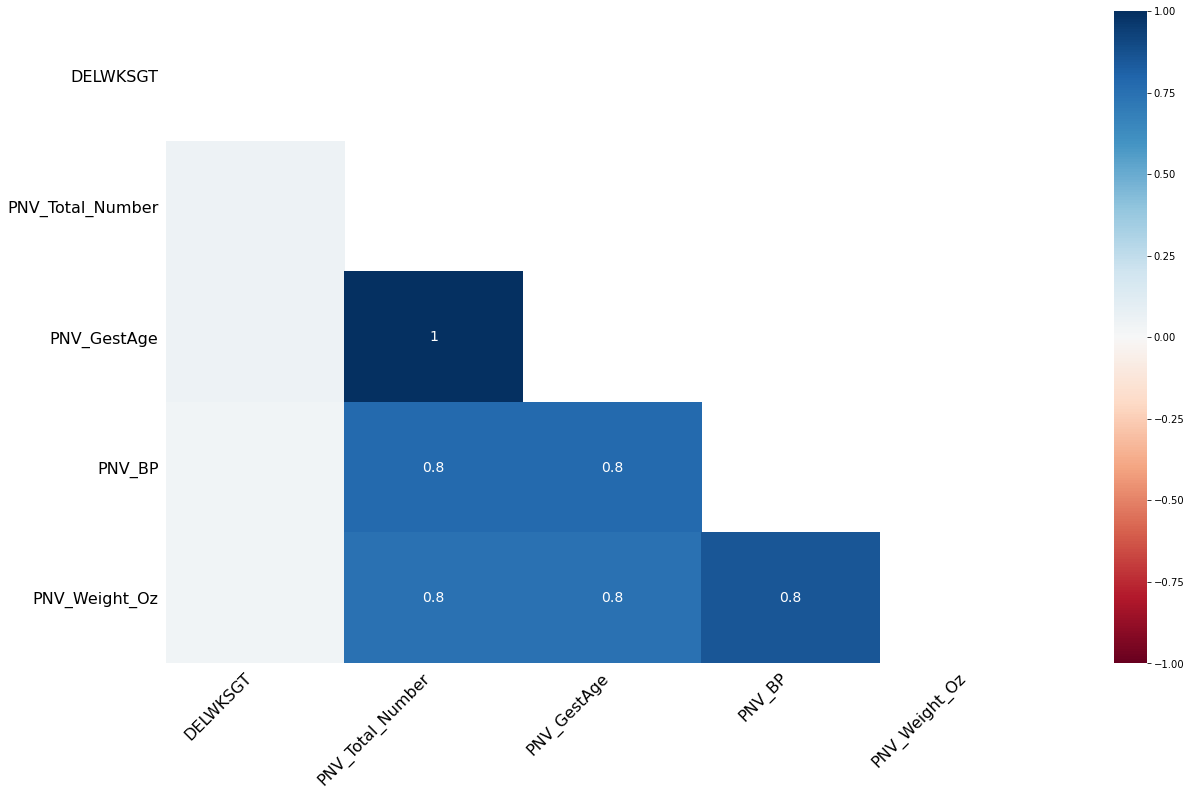

In [304]:
msno.heatmap(prenatal)

First take a look at DELWKSGT, doesn't seem to have any information that isn't in momi general

In [234]:
prenatal[prenatal['DELWKSGT'].isnull()].sort_values(by=['MOMI_ID'])

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,DELWKSGT,MMULGSTD,SINGLETON,PNV_Total_Number,PNV_GestAge,PNV_BP,PNV_Weight_Oz
13669,12388244991990,5,2020,NaN,10,1,NaN,NaN,NaN,NaN
209580,15578298991985,2,2016,NaN,10,1,NaN,NaN,NaN,NaN
87846,18764152991986,3,2020,NaN,10,1,NaN,NaN,NaN,NaN
30317,23531175991988,2,2015,NaN,10,1,NaN,NaN,NaN,NaN
148081,26943825991992,3,2020,NaN,10,1,NaN,NaN,NaN,NaN
92530,31383892991992,2,2020,NaN,10,1,NaN,NaN,NaN,NaN
407106,31669912991996,2,2018,NaN,10,1,NaN,NaN,NaN,NaN
203577,34155533991992,1,2018,NaN,10,1,NaN,NaN,NaN,NaN
351992,37216313991975,1,2017,NaN,10,1,NaN,NaN,NaN,NaN
99090,37833445992002,2,2019,NaN,10,1,NaN,NaN,NaN,NaN


In [236]:
# A list of values that have missing birthweight in prenatal
missingweightIDs = list(prenatal[prenatal['DELWKSGT'].isnull()]['MOMI_ID'].values)

In [250]:
# I'm fairly sure I can safely drop these - they match up with moms that have no prenatal data
prenatal[prenatal['DELWKSGT'].isnull()].sort_values(by=['MOMI_ID'])

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,DELWKSGT,MMULGSTD,SINGLETON,PNV_Total_Number,PNV_GestAge,PNV_BP,PNV_Weight_Oz
13669,12388244991990,5,2020,NaN,10,1,NaN,NaN,NaN,NaN
209580,15578298991985,2,2016,NaN,10,1,NaN,NaN,NaN,NaN
87846,18764152991986,3,2020,NaN,10,1,NaN,NaN,NaN,NaN
30317,23531175991988,2,2015,NaN,10,1,NaN,NaN,NaN,NaN
148081,26943825991992,3,2020,NaN,10,1,NaN,NaN,NaN,NaN
92530,31383892991992,2,2020,NaN,10,1,NaN,NaN,NaN,NaN
407106,31669912991996,2,2018,NaN,10,1,NaN,NaN,NaN,NaN
203577,34155533991992,1,2018,NaN,10,1,NaN,NaN,NaN,NaN
351992,37216313991975,1,2017,NaN,10,1,NaN,NaN,NaN,NaN
99090,37833445992002,2,2019,NaN,10,1,NaN,NaN,NaN,NaN


In [249]:
# Shows dataframe where momi_id matches the ones with missing birthweight in prenatal
momi.loc[(momi['MOMI_ID'].isin(missingweightIDs)) & (momi['Has_Prenatal_Data'] == 0)][['Has_Prenatal_Data','MOMI_ID','DELWKSGT','Delivery_Number_Per_Mother','DeliveryYear', 'MMULGSTD','SINGLETON']]

,Has_Prenatal_Data,MOMI_ID,DELWKSGT,Delivery_Number_Per_Mother,DeliveryYear,MMULGSTD,SINGLETON
3671,0,12388244991990,40.0,1,2008,10,1
3672,0,12388244991990,39.0,2,2012,10,1
3675,0,12388244991990,NaN,5,2020,10,1
13067,0,15578298991985,34.0,1,2014,2,0
13068,0,15578298991985,34.0,1,2014,2,0
13069,0,15578298991985,NaN,2,2016,10,1
22489,0,18764152991986,41.0,1,2011,10,1
22490,0,18764152991986,41.0,2,2014,10,1
22491,0,18764152991986,NaN,3,2020,10,1
33242,0,23531175991988,39.0,1,2008,10,1


In [8]:
# Dropping erroneous prenatal data
prenatal.drop(prenatal[prenatal['DELWKSGT'].isnull()].index, inplace=True)

In [23]:
prenatal.isnull().sum()

MOMI_ID                           0
Delivery_Number_Per_Mother        0
DeliveryYear                      0
DELWKSGT                          0
MMULGSTD                          0
SINGLETON                         0
PNV_Total_Number               7426
PNV_GestAge                    7426
PNV_BP                        12288
PNV_Weight_Oz                 13176
dtype: int64

In [262]:
# Looks like the rows where PNV_Total_Number is missing might also have missing values in the other columns. Safe to drop? 
# Checking to see if still erroneously recorded
prenatal[prenatal['PNV_Total_Number'].isnull()].isnull().sum()

MOMI_ID                          0
Delivery_Number_Per_Mother       0
DeliveryYear                     0
DELWKSGT                         0
MMULGSTD                         0
SINGLETON                        0
PNV_Total_Number              7426
PNV_GestAge                   7426
PNV_BP                        7426
PNV_Weight_Oz                 7426
dtype: int64

Any rows where PNV_Total_Number is missing also has missing values for the rest of the prental visits,
meaning it has no information not already in momi and is safe to drop

In [9]:
# Dropping erroneous prenatal data
prenatal.drop(prenatal[prenatal['PNV_Total_Number'].isnull()].index, inplace=True)

In [26]:
prenatal.isnull().sum()

MOMI_ID                          0
Delivery_Number_Per_Mother       0
DeliveryYear                     0
DELWKSGT                         0
MMULGSTD                         0
SINGLETON                        0
PNV_Total_Number                 0
PNV_GestAge                      0
PNV_BP                        4862
PNV_Weight_Oz                 5750
dtype: int64

In [291]:
prenatal[prenatal['PNV_BP'].isnull()].sort_values(by=['MOMI_ID'])

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,DELWKSGT,MMULGSTD,SINGLETON,PNV_Total_Number,PNV_GestAge,PNV_BP,PNV_Weight_Oz
374845,11153571991987,2,2017,39.000000,10,1,19.0,10.857143,NaN,2752.0
344746,11171387991995,3,2020,40.285714,10,1,8.0,29.142857,NaN,2288.0
212553,11171838991990,2,2020,39.142857,10,1,9.0,15.000000,NaN,NaN
172154,11191453992002,1,2020,40.285714,10,1,3.0,9.000000,NaN,NaN
268891,11216257991991,1,2019,37.142857,10,1,9.0,36.285714,NaN,2675.0
...,...,...,...,...,...,...,...,...,...,...
21485,99874699991993,3,2018,35.428571,10,1,12.0,34.428571,NaN,NaN
73014,99879226991993,3,2018,38.714286,10,1,11.0,38.142857,NaN,NaN
168269,99931957991985,5,2017,39.285714,10,1,12.0,38.714286,NaN,3392.0
168263,99931957991985,5,2017,39.285714,10,1,12.0,29.714286,NaN,NaN


Fairly sure the rest of these are just missing, though why I'm not sure

## Ultrasound Missing

In [301]:
ultrasound.isnull().sum()

MOMI_ID                            0
DeliveryYear                       0
Delivery_Number_Per_Mother         0
DELWKSGT                           0
MMULGSTD                           0
SINGLETON                          0
USExamCategory                     0
USExamType                         0
USGestAge                        668
USGestAgeType                    668
FetusNumber                        0
USPlacLoc_1                        0
USPlacLoc_2                   180862
USPlacLoc_3                   211548
USPlacLoc_4                   219712
USPlacLoc_5                   221249
USPlacLoc_6                   221276
dtype: int64

# Mapping from Prenatal and Ultrasound to MOMI

In [41]:
# First a test 
# Grab the first 10 rows from each 
momiTest = momi.sort_values(by=['MOMI_ID']).head(n=10)
prenatalTest = prenatal.sort_values(by=['MOMI_ID']).head(n=20)

In [28]:
momiTest

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,Has_Prenatal_Data,Has_Ultrasound_PlacLoc,DMOMAGE,FatherAge_State,MomEducation_State,DadEducation_State,NumCig3MoPriorToPreg_State,...,History_PTB,Hist_Trophoblastic_Disease_2,Infant_Number,InfSex,NICULOS,IDEMBWT,IGROWTH,ICNSANAT,IIDSYPH,IIDUTI
0,11111167991974,1,1996,0,0,22.0,NaN,NaN,NaN,NaN,...,0,0,1,M,0.0,1200.0,1.0,0.0,0.0,0.0
1,11111167991974,2,1998,0,0,24.0,NaN,NaN,NaN,NaN,...,0,0,2,F,0.0,2988.0,0.0,0.0,0.0,0.0
2,11111281991979,1,2007,0,0,28.0,NaN,NaN,NaN,NaN,...,0,0,1,F,0.0,3560.0,0.0,0.0,0.0,0.0
3,11111281991979,2,2009,0,0,30.0,NaN,NaN,NaN,NaN,...,0,0,2,F,0.0,3355.0,0.0,0.0,0.0,0.0
4,11111281991979,3,2011,0,0,32.0,34.0,Bachelor's degree,Master's degree,0.0,...,0,0,3,M,0.0,4025.0,0.0,0.0,0.0,0.0
5,11111351991995,1,2016,1,1,21.0,99.0,High school graduate or GED completed,NaN,0.0,...,0,0,1,M,0.0,3190.0,0.0,0.0,0.0,0.0
6,11111891991995,1,2013,0,1,17.0,18.0,"9th-12th grade, no diploma","9th-12th grade, no diploma",5.0,...,0,0,1,M,NaN,1902.0,0.0,0.0,0.0,0.0
7,11112391991988,1,2009,0,0,21.0,99.0,High school graduate or GED completed,High school graduate or GED completed,10.0,...,0,0,1,M,0.0,3645.0,0.0,0.0,0.0,0.0
8,11112391991988,2,2018,1,0,29.0,NaN,NaN,NaN,NaN,...,0,0,2,F,0.0,3145.0,0.0,0.0,0.0,0.0
9,11113314991981,1,2010,0,0,28.0,29.0,Bachelor's degree,Bachelor's degree,0.0,...,0,0,1,M,0.0,2778.0,1.0,0.0,0.0,0.0


In [42]:
prenatalTest

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,DELWKSGT,MMULGSTD,SINGLETON,PNV_Total_Number,PNV_GestAge,PNV_BP,PNV_Weight_Oz
308942,11111351991995,1,2016,39.714286,10,1,9.0,27.571429,118/69,2336.0
308948,11111351991995,1,2016,39.714286,10,1,9.0,38.571429,121/76,2448.0
308947,11111351991995,1,2016,39.714286,10,1,9.0,37.571429,122/79,2432.0
308946,11111351991995,1,2016,39.714286,10,1,9.0,36.142857,114/74,2464.0
308945,11111351991995,1,2016,39.714286,10,1,9.0,34.428571,125/70,2448.0
308944,11111351991995,1,2016,39.714286,10,1,9.0,32.571429,110/61,2416.0
308943,11111351991995,1,2016,39.714286,10,1,9.0,30.571429,127/75,2400.0
308941,11111351991995,1,2016,39.714286,10,1,9.0,21.571429,103/67,2224.0
308949,11111351991995,1,2016,39.714286,10,1,9.0,39.571429,120/75,2464.0
117283,11112391991988,2,2018,39.857143,10,1,9.0,27.857143,125/60,2048.0


In [32]:
prenatalTest.groupby(['MOMI_ID','Delivery_Number_Per_Mother'])['PNV_GestAge'].size()

MOMI_ID         Delivery_Number_Per_Mother
11111351991995  1                             9
11112391991988  2                             1
Name: PNV_GestAge, dtype: int64

In [50]:
# How to grab the number of visits before week 20 
visitsBefore20 = prenatalTest.loc[prenatalTest['PNV_GestAge'] < 20].groupby(['MOMI_ID','Delivery_Number_Per_Mother'])['PNV_GestAge'].size().to_frame()

# How to grab the number of visits before week 20 
visitsAfter20 = prenatalTest.loc[prenatalTest['PNV_GestAge'] > 20].groupby(['MOMI_ID','Delivery_Number_Per_Mother'])['PNV_GestAge'].size().to_frame()

prenatalTest = pd.merge(prenatalTest, visitsBefore20,  how='left', left_on=['MOMI_ID', 'Delivery_Number_Per_Mother'], right_on = ['MOMI_ID', 'Delivery_Number_Per_Mother'], suffixes=(None, 'before20'))
prenatalTest = pd.merge(prenatalTest, visitsAfter20,  how='left', left_on=['MOMI_ID', 'Delivery_Number_Per_Mother'], right_on = ['MOMI_ID', 'Delivery_Number_Per_Mother'], suffixes=(None, 'after20'))


prenatalTest.rename(columns={'PNV_GestAgebefore20': 'VisitsBefore20Weeks', 'PNV_GestAgeafter20': 'VisitsAfter20Weeks'}, inplace=True)

prenatalTest['VisitsBefore20Weeks'] = np.where(prenatalTest['VisitsBefore20Weeks'].isnull(), 0,prenatalTest['VisitsBefore20Weeks'])
prenatalTest['VisitsAfter20Weeks'] = np.where(prenatalTest['VisitsAfter20Weeks'].isnull(), 0,prenatalTest['VisitsAfter20Weeks'])

In [57]:
# Joining Dataframes
joinTest = pd.merge(momiTest, prenatalTest,  how='left', left_on=['MOMI_ID', 'Delivery_Number_Per_Mother', 'DeliveryYear', 'MMULGSTD', 'SINGLETON', 'DELWKSGT'], right_on = ['MOMI_ID', 'Delivery_Number_Per_Mother', 'DeliveryYear', 'MMULGSTD', 'SINGLETON', 'DELWKSGT'])

In [58]:
joinTest

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,Has_Prenatal_Data,Has_Ultrasound_PlacLoc,DMOMAGE,FatherAge_State,MomEducation_State,DadEducation_State,NumCig3MoPriorToPreg_State,...,IGROWTH,ICNSANAT,IIDSYPH,IIDUTI,PNV_Total_Number,PNV_GestAge,PNV_BP,PNV_Weight_Oz,VisitsBefore20Weeks,VisitsAfter20Weeks
0,11111167991974,1,1996,0,0,22.0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,11111167991974,2,1998,0,0,24.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,11111281991979,1,2007,0,0,28.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,11111281991979,2,2009,0,0,30.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,11111281991979,3,2011,0,0,32.0,34.0,Bachelor's degree,Master's degree,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,11111351991995,1,2016,1,1,21.0,99.0,High school graduate or GED completed,NaN,0.0,...,0.0,0.0,0.0,0.0,9.0,27.571429,118/69,2336.0,0.0,9.0
6,11111351991995,1,2016,1,1,21.0,99.0,High school graduate or GED completed,NaN,0.0,...,0.0,0.0,0.0,0.0,9.0,38.571429,121/76,2448.0,0.0,9.0
7,11111351991995,1,2016,1,1,21.0,99.0,High school graduate or GED completed,NaN,0.0,...,0.0,0.0,0.0,0.0,9.0,37.571429,122/79,2432.0,0.0,9.0
8,11111351991995,1,2016,1,1,21.0,99.0,High school graduate or GED completed,NaN,0.0,...,0.0,0.0,0.0,0.0,9.0,36.142857,114/74,2464.0,0.0,9.0
9,11111351991995,1,2016,1,1,21.0,99.0,High school graduate or GED completed,NaN,0.0,...,0.0,0.0,0.0,0.0,9.0,34.428571,125/70,2448.0,0.0,9.0


In [59]:
# Removes duplicates
joinTest.drop_duplicates(subset=['VisitsBefore20Weeks','VisitsAfter20Weeks', 'MOMI_ID', 'Delivery_Number_Per_Mother'], inplace=True)
joinTest.drop(columns=['PNV_GestAge', 'PNV_BP', 'PNV_Weight_Oz'], inplace=True)

# where there's no PNVs, set total number to 0. 
joinTest['PNV_Total_Number'] = np.where(joinTest['Has_Prenatal_Data'] == 0, 0, joinTest['PNV_Total_Number'])
joinTest['VisitsBefore20Weeks'] = np.where(joinTest['Has_Prenatal_Data'] == 0, 0, joinTest['VisitsBefore20Weeks'])
joinTest['VisitsAfter20Weeks'] = np.where(joinTest['Has_Prenatal_Data'] == 0, 0, joinTest['VisitsAfter20Weeks'])

In [60]:
joinTest

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,Has_Prenatal_Data,Has_Ultrasound_PlacLoc,DMOMAGE,FatherAge_State,MomEducation_State,DadEducation_State,NumCig3MoPriorToPreg_State,...,InfSex,NICULOS,IDEMBWT,IGROWTH,ICNSANAT,IIDSYPH,IIDUTI,PNV_Total_Number,VisitsBefore20Weeks,VisitsAfter20Weeks
0,11111167991974,1,1996,0,0,22.0,NaN,NaN,NaN,NaN,...,M,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11111167991974,2,1998,0,0,24.0,NaN,NaN,NaN,NaN,...,F,0.0,2988.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11111281991979,1,2007,0,0,28.0,NaN,NaN,NaN,NaN,...,F,0.0,3560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11111281991979,2,2009,0,0,30.0,NaN,NaN,NaN,NaN,...,F,0.0,3355.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11111281991979,3,2011,0,0,32.0,34.0,Bachelor's degree,Master's degree,0.0,...,M,0.0,4025.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,11111351991995,1,2016,1,1,21.0,99.0,High school graduate or GED completed,NaN,0.0,...,M,0.0,3190.0,0.0,0.0,0.0,0.0,9.0,0.0,9.0
14,11111891991995,1,2013,0,1,17.0,18.0,"9th-12th grade, no diploma","9th-12th grade, no diploma",5.0,...,M,NaN,1902.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,11112391991988,1,2009,0,0,21.0,99.0,High school graduate or GED completed,High school graduate or GED completed,10.0,...,M,0.0,3645.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,11112391991988,2,2018,1,0,29.0,NaN,NaN,NaN,NaN,...,F,0.0,3145.0,0.0,0.0,0.0,0.0,9.0,2.0,7.0
25,11113314991981,1,2010,0,0,28.0,29.0,Bachelor's degree,Bachelor's degree,0.0,...,M,0.0,2778.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# How to grab the number of visits before week 20 
visitsBefore20 = prenatal.loc[prenatal['PNV_GestAge'] < 20].groupby(['MOMI_ID','Delivery_Number_Per_Mother'])['PNV_GestAge'].size().to_frame()

# How to grab the number of visits after week 20 
visitsAfter20 = prenatal.loc[prenatal['PNV_GestAge'] > 20].groupby(['MOMI_ID','Delivery_Number_Per_Mother'])['PNV_GestAge'].size().to_frame()

prenatal = pd.merge(prenatal, visitsBefore20,  how='left', left_on=['MOMI_ID', 'Delivery_Number_Per_Mother'], right_on = ['MOMI_ID', 'Delivery_Number_Per_Mother'], suffixes=(None, 'before20'))
prenatal = pd.merge(prenatal, visitsAfter20,  how='left', left_on=['MOMI_ID', 'Delivery_Number_Per_Mother'], right_on = ['MOMI_ID', 'Delivery_Number_Per_Mother'], suffixes=(None, 'after20'))

prenatal.rename(columns={'PNV_GestAgebefore20': 'VisitsBefore20Weeks', 'PNV_GestAgeafter20': 'VisitsAfter20Weeks'}, inplace=True)

prenatal['VisitsBefore20Weeks'] = np.where(prenatal['VisitsBefore20Weeks'].isnull(), 0,prenatal['VisitsBefore20Weeks'])
prenatal['VisitsAfter20Weeks'] = np.where(prenatal['VisitsAfter20Weeks'].isnull(), 0,prenatal['VisitsAfter20Weeks'])

# Joining Dataframes
momi = pd.merge(momi, prenatal,  how='left', left_on=['MOMI_ID', 'Delivery_Number_Per_Mother', 'DeliveryYear', 'MMULGSTD', 'SINGLETON', 'DELWKSGT'], right_on = ['MOMI_ID', 'Delivery_Number_Per_Mother', 'DeliveryYear', 'MMULGSTD', 'SINGLETON', 'DELWKSGT'])

# Removes duplicates
momi.drop_duplicates(subset=['VisitsBefore20Weeks','VisitsAfter20Weeks', 'MOMI_ID', 'Delivery_Number_Per_Mother'], inplace=True)
momi.drop(columns=['PNV_GestAge', 'PNV_BP', 'PNV_Weight_Oz'], inplace=True)

# where there's no PNVs, set total number to 0. 
momi['PNV_Total_Number'] = np.where(momi['Has_Prenatal_Data'] == 0, 0, momi['PNV_Total_Number'])
momi['VisitsBefore20Weeks'] = np.where(momi['Has_Prenatal_Data'] == 0, 0, momi['VisitsBefore20Weeks'])
momi['VisitsAfter20Weeks'] = np.where(momi['Has_Prenatal_Data'] == 0, 0, momi['VisitsAfter20Weeks'])

# Adjusting variables

In [342]:
list(momi.columns)

['MOMI_ID',
 'Delivery_Number_Per_Mother',
 'DeliveryYear',
 'Has_Prenatal_Data',
 'Has_Ultrasound_PlacLoc',
 'MotherAge',
 'FatherAge',
 'MomEducation_State',
 'DadEducation_State',
 'NumCig3MoPriorToPreg_State',
 'NumCigFirstTri_State',
 'NumCigSecondTri_State',
 'NumCigThirdTri_State',
 'Smoke_a',
 'Smoke_b',
 'Alcohol_a',
 'Race',
 'Ethnicity',
 'Insurance',
 'GestAgeDelivery',
 'TotalNumPregnancies',
 'DeliveriesPriorAdmission',
 'TotalAbortions',
 'Primagrivada',
 'MaternalHeightMeters',
 'PrePregWeight',
 'WeightAtAdmission',
 'HoursLaborToDelivery',
 'HoursMembraneReptureDelivery',
 'RepeatCesarean',
 'DeliveryMethod',
 'OutcomeOfDelivery',
 'SINGLETON',
 'FetalDeath',
 'MaternalNeuromuscularDisease',
 'MCollagenVascularDisease',
 'MStructuralHeartDiseas',
 'ChronicHypertension',
 'PregRelatedHypertension',
 'Gest_HTN',
 'Mild_PE',
 'Severe_PE',
 'SIPE',
 'Unspecified_HTN',
 'MPostPartumComplications',
 'Depression',
 'DiabetesMellitus',
 'ThyroidDisease',
 'HyperemesisGravidar

## Education Adjustment

In [11]:
momi['MomEducation_State'].nunique()

8

In [12]:
momi['MomEducation_State'].unique()

array([nan, "Bachelor's degree", 'High school graduate or GED completed',
       '9th-12th grade, no diploma', "Master's degree",
       'Doctorate or Professional degree',
       'Some college credit, no degree', 'Associate degree',
       '8th grade or less'], dtype=object)

In [13]:
momi['DadEducation_State'].nunique()

9

In [14]:
momi['DadEducation_State'].unique()

array([nan, "Master's degree", '9th-12th grade, no diploma',
       'High school graduate or GED completed', "Bachelor's degree",
       'Associate degree', 'Doctorate or professional degree',
       'Doctorate or Professional degree',
       'Some college credit, no degree', '8th grade or less'],
      dtype=object)

In [11]:
# Ordinal Encoding Education
education_map = {'8th grade or less': 1, 
                 '9th-12th grade, no diploma': 2, 
                 'High school graduate or GED completed': 3,
                 'Some college credit, no degree': 4, 
                 'Associate degree': 5, 
                 "Bachelor's degree": 6,
                 "Master's degree": 7,
                 'Doctorate or professional degree': 8, 
                 'Doctorate or Professional degree': 8}

momi['DadEducation_State'] = momi['DadEducation_State'].map(education_map)

momi['MomEducation_State'] = momi['MomEducation_State'].map(education_map)

## Race and Ethnicity

In [12]:
# Renaming Race variables for easier comparison
raceMap = {'B':'AfricanAmerican','C':"Chinese",'D':"Declined",
          'E':"OtherAsian",'F':"Filipino",'G':"Guam/Chamorro",
          'I':"Indian(Asian)", 'J':"Japanese",'K':"Korean",
          'L':"AlaskanNative",'N':"NativeAmerican",'P':"OtherPacificIslander",
          'Q':"Hawaiian", 'S':"Samoan",'V':"Vietnamese",'W':"White", 'D':"Declined", 9: np.NaN}

momi['Race'] = momi['Race'].map(raceMap)

In [68]:
momi['Race'].value_counts(normalize=True, dropna=False)

White                   0.745627
AfricanAmerican         0.190388
NaN                     0.020802
OtherAsian              0.020140
Indian(Asian)           0.006889
Chinese                 0.005229
Declined                0.004841
NativeAmerican          0.002052
Korean                  0.000867
Filipino                0.000841
Japanese                0.000654
Vietnamese              0.000614
OtherPacificIslander    0.000423
AlaskanNative           0.000301
Guam/Chamorro           0.000218
Hawaiian                0.000078
Samoan                  0.000035
Name: Race, dtype: float64

In [69]:
momi['Race'].value_counts(dropna=False)

White                   171117
AfricanAmerican          43693
NaN                       4774
OtherAsian                4622
Indian(Asian)             1581
Chinese                   1200
Declined                  1111
NativeAmerican             471
Korean                     199
Filipino                   193
Japanese                   150
Vietnamese                 141
OtherPacificIslander        97
AlaskanNative               69
Guam/Chamorro               50
Hawaiian                    18
Samoan                       8
Name: Race, dtype: int64

In [73]:
uniqueMoms = momi.drop_duplicates(subset=['MOMI_ID'])
uniqueMoms['Race'].value_counts(dropna=False)

White                   115563
AfricanAmerican          26790
NaN                       3878
OtherAsian                3672
Indian(Asian)             1284
Chinese                    932
Declined                   830
NativeAmerican             348
Korean                     147
Filipino                   139
Japanese                   115
Vietnamese                 100
OtherPacificIslander        78
AlaskanNative               50
Guam/Chamorro               43
Hawaiian                    13
Samoan                       5
Name: Race, dtype: int64

In [74]:
uniqueMoms['Race'].value_counts(normalize=True, dropna=False)

White                   0.750472
AfricanAmerican         0.173976
NaN                     0.025184
OtherAsian              0.023846
Indian(Asian)           0.008338
Chinese                 0.006052
Declined                0.005390
NativeAmerican          0.002260
Korean                  0.000955
Filipino                0.000903
Japanese                0.000747
Vietnamese              0.000649
OtherPacificIslander    0.000507
AlaskanNative           0.000325
Guam/Chamorro           0.000279
Hawaiian                0.000084
Samoan                  0.000032
Name: Race, dtype: float64

In [75]:
uniqueMoms.shape

(153987, 101)

In [64]:
momi['Ethnicity'].value_counts()

NOT HISPANIC OR LATINO    125283
DECLINED                    4025
HISPANIC OR LATINO          1915
Name: Ethnicity, dtype: int64

In [68]:
momi['Ethnicity'].isnull().sum()/len(momi)*100

42.82072733927684

42% of Ethnicity Variable is missing

In [20]:
# Might also want to look at grouped Racial/Ethnic Groups
momi['RacialEthnic'] = np.NaN

AsianGroups = ['OtherAsian','Indian(Asian)','Chinese','Korean','Filipino','Japanese','Vietnamese']
Polynesian = ['Hawaiian','Samoan','OtherPacificIslander','Guam/Chamorro'] #Unsure about Guam
NativeGroups = ['NativeAmerican','AlaskanNative']

#Asian
momi['RacialEthnic'] = np.where((momi['Race'].isin(AsianGroups)) & (momi['Ethnicity']=='NOT HISPANIC OR LATINO'), 'Asian Non-Hispanic',momi['RacialEthnic'])
momi['RacialEthnic'] = np.where((momi['Race'].isin(AsianGroups)) & (momi['Ethnicity']=='HISPANIC OR LATINO'), 'Asian Hispanic',momi['RacialEthnic'])
#Polynesian
momi['RacialEthnic'] = np.where((momi['Race'].isin(Polynesian)) & (momi['Ethnicity']=='NOT HISPANIC OR LATINO'), 'Polynesian Non-Hispanic',momi['RacialEthnic'])
momi['RacialEthnic'] = np.where((momi['Race'].isin(Polynesian)) & (momi['Ethnicity']=='HISPANIC OR LATINO'), 'Polynesian Hispanic',momi['RacialEthnic'])
#Native
momi['RacialEthnic'] = np.where((momi['Race'].isin(NativeGroups)) & (momi['Ethnicity']=='NOT HISPANIC OR LATINO'), 'Native Non-Hispanic',momi['RacialEthnic'])
momi['RacialEthnic'] = np.where((momi['Race'].isin(NativeGroups)) & (momi['Ethnicity']=='HISPANIC OR LATINO'), 'Native Hispanic',momi['RacialEthnic'])
#African
momi['RacialEthnic'] = np.where((momi['Race']=='AfricanAmerican') & (momi['Ethnicity']=='NOT HISPANIC OR LATINO'), 'African Non-Hispanic',momi['RacialEthnic'])
momi['RacialEthnic'] = np.where((momi['Race']=='AfricanAmerican') & (momi['Ethnicity']=='HISPANIC OR LATINO'), 'African Hispanic',momi['RacialEthnic'])
#White
momi['RacialEthnic'] = np.where((momi['Race']=='White') & (momi['Ethnicity']=='NOT HISPANIC OR LATINO'), 'White Non-Hispanic',momi['RacialEthnic'])
momi['RacialEthnic'] = np.where((momi['Race']=='White') & (momi['Ethnicity']=='HISPANIC OR LATINO'), 'White Hispanic',momi['RacialEthnic'])

In [21]:
momi['RacialEthnic'].value_counts()

nan                        103903
White Non-Hispanic          91828
African Non-Hispanic        26486
Asian Non-Hispanic           5128
White Hispanic               1258
Native Non-Hispanic           345
African Hispanic              246
Asian Hispanic                129
Polynesian Non-Hispanic       104
Polynesian Hispanic            34
Native Hispanic                33
Name: RacialEthnic, dtype: int64

In [18]:
momi['Ethnicity'].unique()

array([nan, 'NOT HISPANIC OR LATINO', 'HISPANIC OR LATINO'], dtype=object)

## Hypertensive Disorders

In [17]:
momi['MOBHTN'].unique()

array([3, 0, 2, 1, 9, 6, 5])

In [13]:
# Renaming Hypertensive variables for easier comparison
hypMap = {0: 'None', 1: 'TransientHypertension',
          2: 'Preeclampsia mild', 3: 'PreeclampsiaSevere',
          5: 'Eclampsia', 6: 'ChronicHypwPre',
          8: 'MultipleDiagnosticCodes', 9: 'UnspecifiedHyp'}

momi['MOBHTN'] = momi['MOBHTN'].map(hypMap)

In [19]:
# Shows groupings of hypertension, some I can fix easily , some I may need input on 
momi.groupby(['MOBHTN','Mild_PE', 'Severe_PE', 'SIPE']).size().reset_index()

,MOBHTN,Mild_PE,Severe_PE,SIPE,0
0,ChronicHypwPre,0,0,1,2316
1,ChronicHypwPre,0,1,1,88
2,ChronicHypwPre,1,0,1,105
3,ChronicHypwPre,1,1,1,3
4,Eclampsia,0,0,0,106
5,Eclampsia,0,1,0,18
6,Eclampsia,1,0,0,15
7,Eclampsia,1,1,0,3
8,None,0,0,0,200421
9,Preeclampsia mild,1,0,0,7624


In [15]:
# Set mildpe to 0 if marked severe 
momi['Mild_PE'] = np.where(momi['MOBHTN'] == 'PreeclampsiaSevere', 0, momi['Mild_PE'])

In [14]:
# Looking at any occurance of Preeclampsia
momi['Preeclampsia'] = np.NaN

momi['Preeclampsia'] = np.where((momi['Mild_PE'] == 1) | (momi['Severe_PE']==1) | (momi['SIPE']==1), 1 ,0)

# Rename Variables

In [24]:
momi.rename(columns={"DMOMAGE": "MotherAge", "FatherAge_State": "FatherAge", "DFC": "Insurance",
                    "DELWKSGT": "GestAgeDelivery", "MHXGRAV": "TotalNumPregnancies", "MHXPARA": "DeliveriesPriorAdmission",
                    "MHXABORT": "TotalAbortions", "PRIMIP": "Primagrivada", "DMOMHGT": "MaternalHeightMeters",
                    "MOBRPWT": "PrePregWeight", "MOBADMWT": "WeightAtAdmission", "FOBLABHR": "HoursLaborToDelivery",
                    "FOBROMHR": "HoursMembraneReptureDelivery", "CSREPEAT": "RepeatCesarean", "FDELTYPE": "DeliveryMethod",
                    "MMULGSTD": "OutcomeOfDelivery", "FOBDEATH": "FetalDeath", "MCNSMUSC": "MaternalNeuromuscularDisease",
                    "MCOLVASC": "MCollagenVascularDisease", "MCVDANAT": "MStructuralHeartDiseas", "MCVDHTN":"ChronicHypertension",
                    "MOBHTN": "PregRelatedHypertension", "MDELCOMP": "MPostPartumComplications", "MDEPRESS": "Depression",
                    "MENDDIAB": "DiabetesMellitus", "MENDTHY": "ThyroidDisease", "MGIHYPER": "HyperemesisGravidarum",
                    "MGILGBP": "MLiverGallPanc", "MGUINFER": "HistoryInfertility", "MGURENAL": "KidneyDisease",
                    "MHEARTOPER": "OperationsOnHeartandPericardium", "MHEMANEM": "MAnemiaWOHemoglobinopathy",
                    "MHEMHGB": "MHemoglobinopathy", "MHEMPLT": "Thrombocytopenia", "MHEMTRAN": "TransfusionOfPRBC",
                    "MIDBV": "BacterialVaginosis", "MIDCHLAM": "Chlamydia", "MIDCONDY": "Condylomata",
                    "MIDGBS":"GroupBStrep", "MIDGC": "GonococcalInfection", "MIDHEPB": "HepBInfection",
                    "MIDHSV": "Herpes", "MIDTB": "Tuberculosis", "MIDTRICH": "Trichomonas", "MIDVIRPR": "ViralOrProtoInf",
                    "MINTERINJ": "ThoraxAbPelvInjuries", "MMORTECLAMP": "Eclampsia", "MMORTHEARTFAIL": "HeartFailure",
                    "MMORTRENAL": "AcuteRenalFailure", "MMORTSICKLECELL": "SickleCell", "MOBPRECS": "PreviousCesarean",
                    "MPULASTH": "Asthma", "MTOXCOC": "Cocaine", "MTOXNARC": "Opioid", "MTOXOTHR": "OtherSubstanceAbuse",
                    "MTOXTHC": "Marijuana", "IDEMBWT": "InfantWeightGrams", "IGROWTH": "GestWeightCompare",
                    "ICNSANAT": "CNSAbnormality", "IIDSYPH": "CongenitalSyphilis", "IIDUTI": "UTI", "Alcohol_a": 'Drinks/Week'}, inplace=True)
#prenatal.rename(columns={"MMULGSTD": "OutcomeOfDelivery", "DELWKSGT": "GestAgeDelivery"}, inplace=True)
#ultrasound.rename(columns={"MMULGSTD": "OutcomeOfDelivery", "DELWKSGT": "GestAgeDelivery"}, inplace=True)

# Search for Unique Moms

In [112]:
momi.sort_values(by=['Has_Prenatal_Data'], inplace=True)

In [117]:
uniqueMoms = momi.drop_duplicates('MOMI_ID',keep='last')

In [122]:
uniqueMoms.shape

(153987, 101)

In [118]:
uniqueMoms['Has_Prenatal_Data'].sum()

39092

In [120]:
prenatal['MOMI_ID'].unique().shape

(39092,)

In [123]:
39092/153987*100

25.386558605596576

# Explore MOMI

In [15]:
list(momi.columns)

['MOMI_ID',
 'Delivery_Number_Per_Mother',
 'DeliveryYear',
 'Has_Prenatal_Data',
 'Has_Ultrasound_PlacLoc',
 'MotherAge',
 'FatherAge',
 'MomEducation_State',
 'DadEducation_State',
 'NumCig3MoPriorToPreg_State',
 'NumCigFirstTri_State',
 'NumCigSecondTri_State',
 'NumCigThirdTri_State',
 'Smoke_a',
 'Smoke_b',
 'Alcohol_a',
 'Race',
 'Ethnicity',
 'Insurance',
 'GestAgeDelivery',
 'TotalNumPregnancies',
 'DeliveriesPriorAdmission',
 'TotalAbortions',
 'Primagrivada',
 'MaternalHeightMeters',
 'PrePregWeight',
 'WeightAtAdmission',
 'HoursLaborToDelivery',
 'HoursMembraneReptureDelivery',
 'RepeatCesarean',
 'DeliveryMethod',
 'OutcomeOfDelivery',
 'SINGLETON',
 'FetalDeath',
 'MaternalNeuromuscularDisease',
 'MCollagenVascularDisease',
 'MStructuralHeartDiseas',
 'ChronicHypertension',
 'PregRelatedHypertension',
 'Gest_HTN',
 'Mild_PE',
 'Severe_PE',
 'SIPE',
 'Unspecified_HTN',
 'MPostPartumComplications',
 'Depression',
 'DiabetesMellitus',
 'ThyroidDisease',
 'HyperemesisGravidar

In [23]:
momi['Eclampsia'].sum()

140

In [23]:
momi['PregRelatedHypertension'].value_counts()

None                     200421
TransientHypertension     13903
Preeclampsia mild          7624
PreeclampsiaSevere         4701
ChronicHypwPre             2512
UnspecifiedHyp              191
Eclampsia                   142
Name: PregRelatedHypertension, dtype: int64

In [26]:
momi['Mild_PE'].sum()

7750

In [27]:
momi['Severe_PE'].sum()

4813

In [28]:
momi['SIPE'].sum()

2512

In [24]:
momi.groupby('Race')[['Mild_PE', 'Severe_PE', 'SIPE']].sum()

,Mild_PE,Severe_PE,SIPE
Race,,,
AfricanAmerican,1773,1159,796
AlaskanNative,3,1,0
Chinese,22,7,5
Filipino,9,8,1
Guam/Chamorro,0,0,0
Hawaiian,0,0,0
Indian(Asian),59,29,6
Japanese,4,1,0
Korean,3,6,1


## A Note on Graphs

Here the percentages are counted as Prevalance (https://www.nimh.nih.gov/health/statistics/what-is-prevalence.shtml),
So each bar is calculated as 
$\frac{\text{Number in group with characteristic}}{\text{Total Number in group}} * 100$


## Education Exploration

In [16]:
# So I can see what I'm looking at

education_map = {1:'8th grade or less', 
                 2:'9th-12th grade, no diploma', 
                 3:'High school graduate or GED completed',
                 4:'Some college credit, no degree', 
                 5:'Associate degree', 
                 6:"Bachelor's degree",
                 7:"Master's degree",
                 8:'Doctorate or Professional degree'}
                 
momi['DadEducation_State'] = momi['DadEducation_State'].map(education_map)

momi['MomEducation_State'] = momi['MomEducation_State'].map(education_map)

edOrder = ['8th grade or less', '9th-12th grade, no diploma','High school graduate or GED completed',
        'Some college credit, no degree','Associate degree',"Bachelor's degree",
        "Master's degree", 'Doctorate or Professional degree']

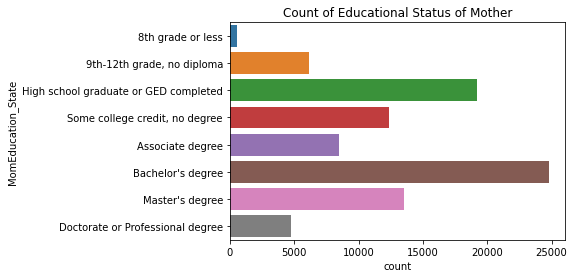

In [22]:
ax = sns.countplot(y="MomEducation_State", data=momi, order=edOrder)
ax.set_title("Count of Educational Status of Mother")
plt.show()

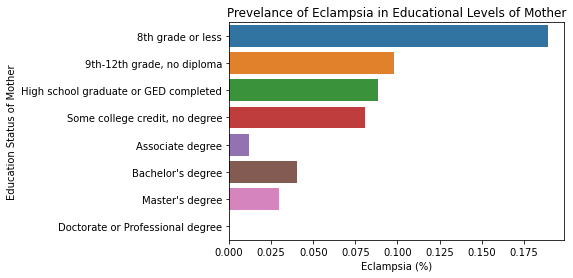

In [28]:
education = (momi.groupby('MomEducation_State')['Eclampsia'].sum())/momi.MomEducation_State.value_counts().sort_index()*100
ax = sns.barplot(y=education.index, x=education.values, order=edOrder)
ax.set(ylabel='Education Status of Mother',xlabel='Eclampsia (%)')
ax.set_title('Prevelance of Eclampsia in Educational Levels of Mother')
plt.show()

[Text(0, 0.5, 'Education Status of Father'), Text(0.5, 0, 'Eclampsia (%)')]

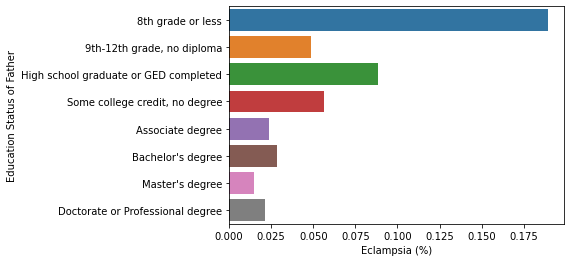

In [206]:
education = (momi.groupby('DadEducation_State')['Eclampsia'].sum())/momi.MomEducation_State.value_counts().sort_index()*100
ax = sns.barplot(y=education.index, x=education.values, order=edOrder)
ax.set(ylabel='Education Status of Father',xlabel='Eclampsia (%)')
ax.set_title('Prevelance of Eclampsia in Educational Levels of Father')
plt.show()

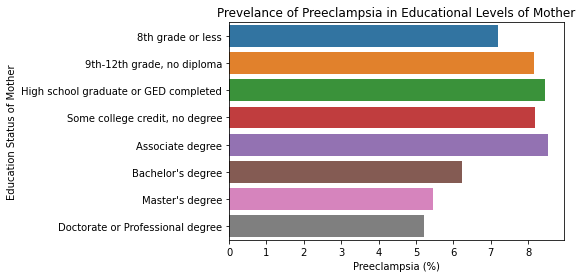

In [29]:
education = (momi.groupby('MomEducation_State')['Preeclampsia'].sum())/momi.MomEducation_State.value_counts().sort_index()*100
ax = sns.barplot(y=education.index, x=education.values, order=edOrder)
ax.set(ylabel='Education Status of Mother',xlabel='Preeclampsia (%)')
ax.set_title('Prevelance of Preeclampsia in Educational Levels of Mother')
plt.show()

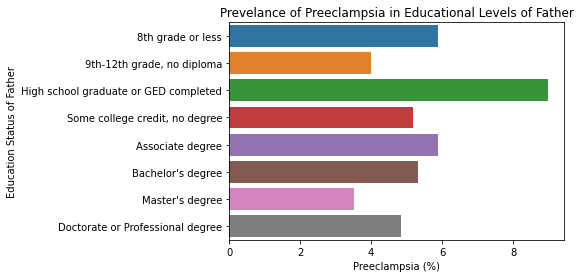

In [30]:
education = (momi.groupby('DadEducation_State')['Preeclampsia'].sum())/momi.MomEducation_State.value_counts().sort_index()*100
ax = sns.barplot(y=education.index, x=education.values, order=edOrder)
ax.set(ylabel='Education Status of Father',xlabel='Preeclampsia (%)')
ax.set_title('Prevelance of Preeclampsia in Educational Levels of Father')
plt.show()

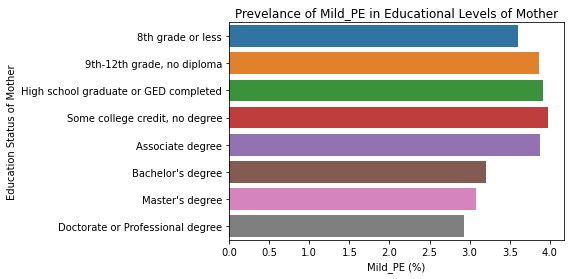

In [32]:
education = (momi.groupby('MomEducation_State')['Mild_PE'].sum())/momi.MomEducation_State.value_counts().sort_index()*100
ax = sns.barplot(y=education.index, x=education.values, order=edOrder)
ax.set(ylabel='Education Status of Mother',xlabel='Mild_PE (%)')
ax.set_title('Prevelance of Mild_PE in Educational Levels of Mother')
plt.show()

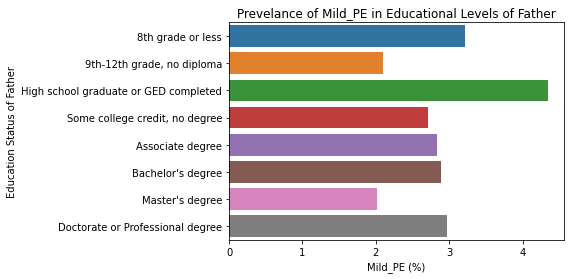

In [33]:
education = (momi.groupby('DadEducation_State')['Mild_PE'].sum())/momi.MomEducation_State.value_counts().sort_index()*100
ax = sns.barplot(y=education.index, x=education.values, order=edOrder)
ax.set(ylabel='Education Status of Father',xlabel='Mild_PE (%)')
ax.set_title('Prevelance of Mild_PE in Educational Levels of Father')
plt.show()

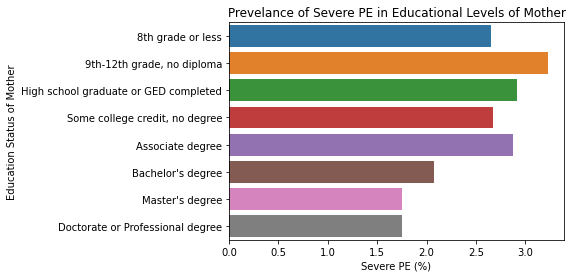

In [34]:
education = (momi.groupby('MomEducation_State')['Severe_PE'].sum())/momi.MomEducation_State.value_counts().sort_index()*100
ax = sns.barplot(y=education.index, x=education.values, order=edOrder)
ax.set(ylabel='Education Status of Mother',xlabel='Severe PE (%)')
ax.set_title('Prevelance of Severe PE in Educational Levels of Mother')
plt.show()

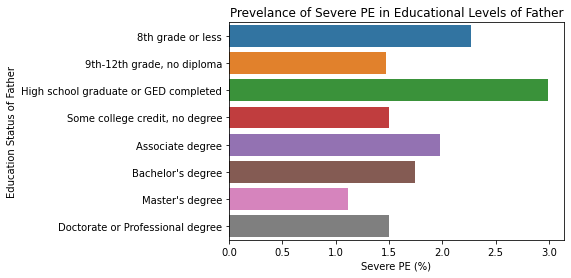

In [35]:
education = (momi.groupby('DadEducation_State')['Severe_PE'].sum())/momi.MomEducation_State.value_counts().sort_index()*100
ax = sns.barplot(y=education.index, x=education.values, order=edOrder)
ax.set(ylabel='Education Status of Father',xlabel='Severe PE (%)')
ax.set_title('Prevelance of Severe PE in Educational Levels of Father')
plt.show()

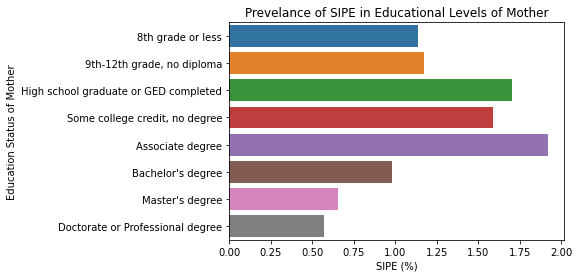

In [36]:

education = (momi.groupby('MomEducation_State')['SIPE'].sum())/momi.MomEducation_State.value_counts()*100
ax = sns.barplot(y=education.index, x=education.values, order=edOrder)
ax.set(ylabel='Education Status of Mother',xlabel='SIPE (%)')
ax.set_title('Prevelance of SIPE in Educational Levels of Mother')
plt.show()

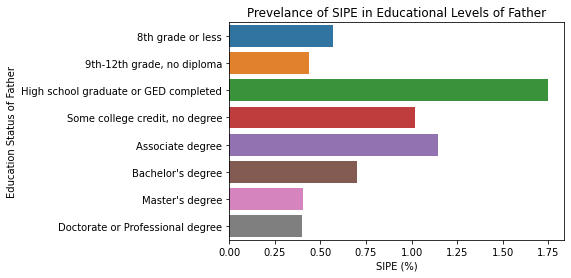

In [37]:
education = (momi.groupby('DadEducation_State')['SIPE'].sum())/momi.MomEducation_State.value_counts()*100
ax = sns.barplot(y=education.index, x=education.values, order=edOrder)
ax.set(ylabel='Education Status of Father',xlabel='SIPE (%)')
ax.set_title('Prevelance of SIPE in Educational Levels of Father')
plt.show()

In [218]:
# Shows the matchup between mom and dad's education level
pd.set_option('display.max_rows', 500)
momi.groupby(['DadEducation_State','MomEducation_State']).size().reset_index()

,DadEducation_State,MomEducation_State,0
0,8th grade or less,8th grade or less,209
1,8th grade or less,"9th-12th grade, no diploma",73
2,8th grade or less,Associate degree,8
3,8th grade or less,Bachelor's degree,9
4,8th grade or less,Doctorate or Professional degree,1
5,8th grade or less,High school graduate or GED completed,53
6,8th grade or less,Master's degree,2
7,8th grade or less,"Some college credit, no degree",17
8,"9th-12th grade, no diploma",8th grade or less,69
9,"9th-12th grade, no diploma","9th-12th grade, no diploma",1253


## Age Data

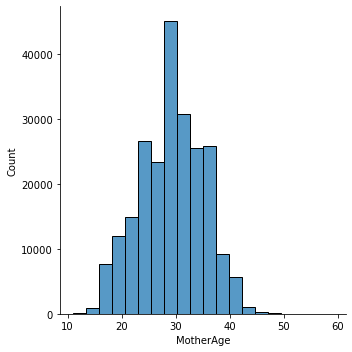

In [39]:
sns.color_palette('bright')
sns.displot(momi, x="MotherAge", bins=20)

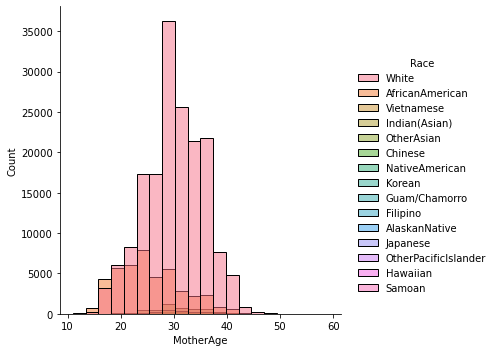

In [95]:
sns.displot(momi, x="MotherAge", hue="Race", bins=20, fill=True)

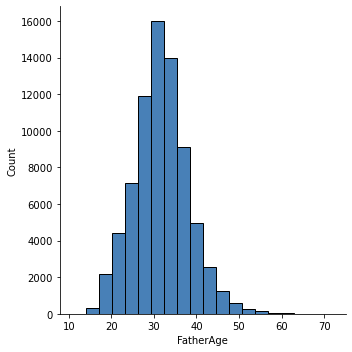

In [89]:
sns.displot(momi, x="FatherAge", bins=20)

In [82]:
momi['FatherAge'].describe()

count    88457.000000
mean        42.166951
std         24.912864
min         11.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         99.000000
Name: FatherAge, dtype: float64

In [40]:
# 99 probably means missing in this dataset
momi['FatherAge'].value_counts().sort_index()

11.0        1
13.0        1
14.0        6
15.0       27
16.0       71
17.0      209
18.0      420
19.0      781
20.0      986
21.0     1240
22.0     1439
23.0     1731
24.0     2039
25.0     2339
26.0     2779
27.0     3277
28.0     4011
29.0     4638
30.0     5058
31.0     5549
32.0     5391
33.0     5102
34.0     4690
35.0     4185
36.0     3547
37.0     3054
38.0     2487
39.0     1999
40.0     1649
41.0     1302
42.0     1029
43.0      830
44.0      676
45.0      521
46.0      426
47.0      319
48.0      269
49.0      166
50.0      148
51.0      100
52.0       80
53.0       55
54.0       54
55.0       39
56.0       36
57.0       24
58.0       23
59.0       11
60.0        9
61.0        9
62.0        6
63.0        4
64.0        1
65.0        3
67.0        2
72.0        1
99.0    13608
Name: FatherAge, dtype: int64

In [41]:
momi['FatherAge'] = np.where(momi['FatherAge'] == 99, np.NaN, momi['FatherAge'])

<AxesSubplot:xlabel='Preeclampsia', ylabel='MotherAge'>

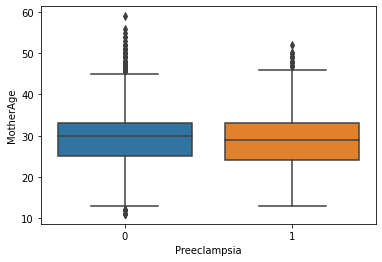

In [42]:
sns.boxplot(x="Preeclampsia", y="MotherAge", data=momi)

<AxesSubplot:xlabel='Preeclampsia', ylabel='FatherAge'>

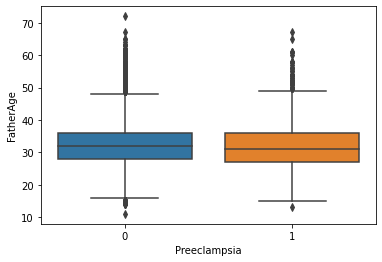

In [43]:
sns.boxplot(x="Preeclampsia", y="FatherAge", data=momi)

## Racial Data

In [36]:
momi['RaceCollapsed'] = np.NaN

AsianGroups = ['OtherAsian','Indian(Asian)','Chinese','Korean','Filipino','Japanese','Vietnamese']
Polynesian = ['Hawaiian','Samoan','OtherPacificIslander','Guam/Chamorro'] #Unsure about Guam
NativeGroups = ['NativeAmerican','AlaskanNative']

#Asian
momi['RaceCollapsed'] = np.where((momi['Race'].isin(AsianGroups)), 'Asian',momi['RaceCollapsed'])
#Polynesian
momi['RaceCollapsed'] = np.where((momi['Race'].isin(Polynesian)), 'Polynesian',momi['RaceCollapsed'])
#Native
momi['RaceCollapsed'] = np.where((momi['Race'].isin(NativeGroups)), 'Native',momi['RaceCollapsed'])
#African
momi['RaceCollapsed'] = np.where((momi['Race']=='AfricanAmerican'), 'African',momi['RaceCollapsed'])
#White
momi['RaceCollapsed'] = np.where((momi['Race']=='White'), 'White',momi['RaceCollapsed'])

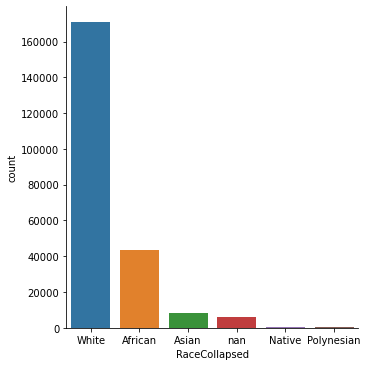

In [37]:
sns.catplot(x="RaceCollapsed", kind="count", data=momi)

<AxesSubplot:xlabel='RaceCollapsed', ylabel='MotherAge'>

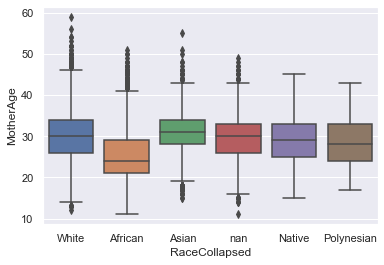

In [123]:
sns.set(font_scale=1) 
sns.boxplot(x="RaceCollapsed", y="MotherAge", data=momi)

[Text(0.5, 0, 'Race'), Text(0, 0.5, 'Preeclampsia (%)')]

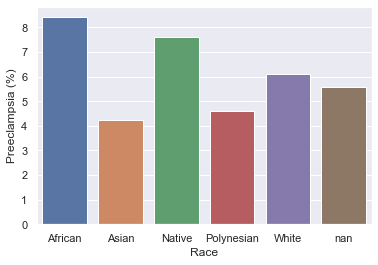

In [151]:
raceCollapsed = (momi.groupby('RaceCollapsed')['Preeclampsia'].sum())/momi.RaceCollapsed.value_counts().sort_index()*100
ax = sns.barplot(x=raceCollapsed.index, y=raceCollapsed.values)
ax.set(xlabel='Race',ylabel='Preeclampsia (%)')

[Text(0.5, 0, 'Race'), Text(0, 0.5, 'Eclampsia (%)')]

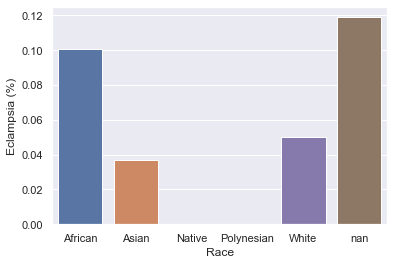

In [152]:
raceCollapsed = (momi.groupby('RaceCollapsed')['Eclampsia'].sum())/momi.RaceCollapsed.value_counts().sort_index()*100
ax = sns.barplot(x=raceCollapsed.index, y=raceCollapsed.values)
ax.set(xlabel='Race',ylabel='Eclampsia (%)')

[Text(0.5, 0, 'Race'), Text(0, 0.5, 'Mild_PE (%)')]

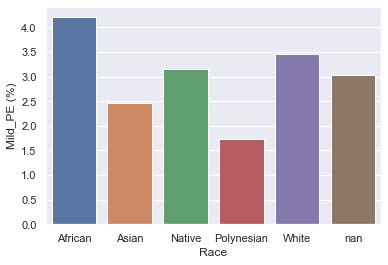

In [153]:
raceCollapsed = (momi.groupby('RaceCollapsed')['Mild_PE'].sum())/momi.RaceCollapsed.value_counts().sort_index()*100
ax = sns.barplot(x=raceCollapsed.index, y=raceCollapsed.values)
ax.set(xlabel='Race',ylabel='Mild_PE (%)')

[Text(0.5, 0, 'Race'), Text(0, 0.5, 'Severe_PE (%)')]

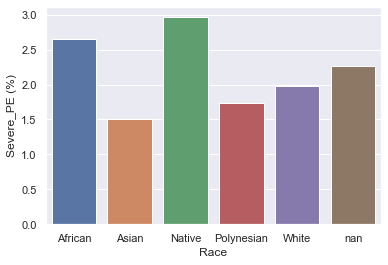

In [157]:
raceCollapsed = (momi.groupby('RaceCollapsed')['Severe_PE'].sum())/momi.RaceCollapsed.value_counts().sort_index()*100
ax = sns.barplot(x=raceCollapsed.index, y=raceCollapsed.values)
ax.set(xlabel='Race',ylabel='Severe_PE (%)')

[Text(0.5, 0, 'Race'), Text(0, 0.5, 'SIPE (%)')]

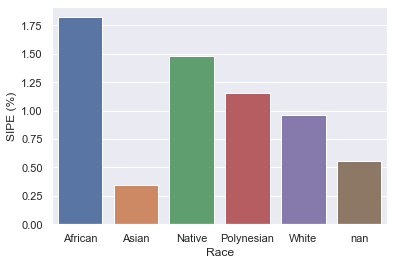

In [156]:
raceCollapsed = (momi.groupby('RaceCollapsed')['SIPE'].sum())/momi.RaceCollapsed.value_counts().sort_index()*100
ax = sns.barplot(x=raceCollapsed.index, y=raceCollapsed.values)
ax.set(xlabel='Race',ylabel='SIPE (%)')

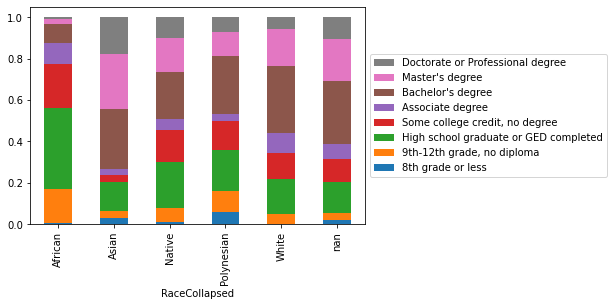

In [134]:
ax = momi.groupby('RaceCollapsed')['MomEducation_State'].value_counts(normalize=True).unstack().reindex(columns=edOrder).plot.bar(stacked=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5))  # reverse to keep order consistent
plt.show()

In [121]:
momi.groupby('RaceCollapsed')['MomEducation_State'].value_counts(normalize=True).unstack().reindex(columns=edOrder)


MomEducation_State,Doctorate or Professional degree,Master's degree,Bachelor's degree,Associate degree,"Some college credit, no degree",High school graduate or GED completed,"9th-12th grade, no diploma",8th grade or less
RaceCollapsed,,,,,,,,
African,0.007405,0.025617,0.092430,0.099726,0.212726,0.391004,0.162479,0.008612
Asian,0.179972,0.260931,0.290832,0.027927,0.036671,0.139351,0.035261,0.029055
Native,0.102113,0.161972,0.228873,0.052817,0.154930,0.221831,0.066901,0.010563
Polynesian,0.069767,0.116279,0.279070,0.034884,0.139535,0.197674,0.104651,0.058140
White,0.056632,0.177650,0.325503,0.097648,0.123170,0.171208,0.044832,0.003358
nan,0.105581,0.200930,0.304651,0.072558,0.112558,0.146977,0.038140,0.018605


## Height and Weight

<AxesSubplot:xlabel='Preeclampsia', ylabel='PrePregWeight'>

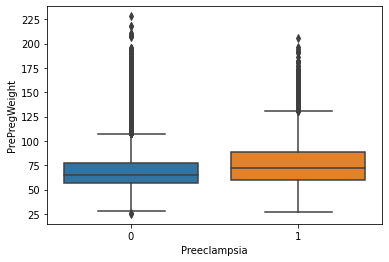

In [151]:
sns.boxplot(x='Preeclampsia',y='PrePregWeight', data=momi)

<AxesSubplot:xlabel='Preeclampsia', ylabel='WeightAtAdmission'>

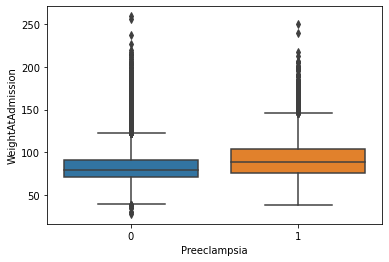

In [152]:
sns.boxplot(x='Preeclampsia',y='WeightAtAdmission', data=momi)

<AxesSubplot:xlabel='Preeclampsia', ylabel='MaternalHeightMeters'>

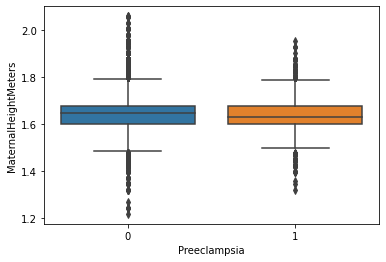

In [156]:
# Not very descriptive
sns.boxplot(x='Preeclampsia',y='MaternalHeightMeters', data=momi)

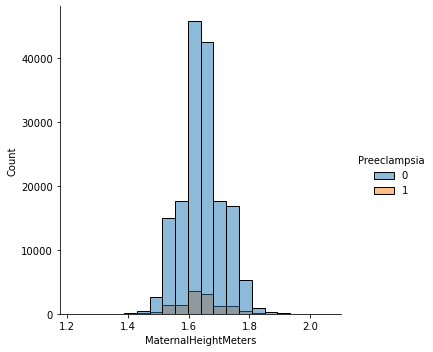

In [162]:
# Doesn't seem super descriptive
sns.displot(momi, x="MaternalHeightMeters", hue = "Preeclampsia",bins=20)

## Gestational Age, Hours to Labor, Hours After Membrane Rupture

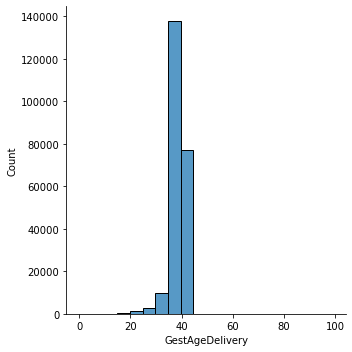

In [164]:
sns.displot(momi, x="GestAgeDelivery", bins=20)

In [228]:
momi['GestAgeDelivery'].describe()

count    229266.000000
mean         38.422253
std           2.852115
min           0.000000
25%          38.000000
50%          39.000000
75%          40.000000
max          99.000000
Name: GestAgeDelivery, dtype: float64

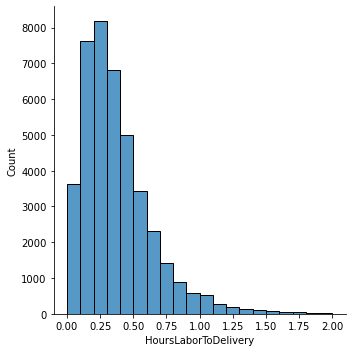

In [198]:
sns.displot(momi[momi['HoursLaborToDelivery']<2], x="HoursLaborToDelivery",binwidth=0.1, bins=20)

<AxesSubplot:xlabel='Preeclampsia', ylabel='HoursLaborToDelivery'>

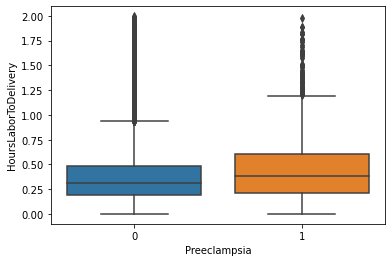

In [201]:
sns.boxplot(data=momi[momi['HoursLaborToDelivery']<2], x='Preeclampsia', y='HoursLaborToDelivery')

In [166]:
# Somehow this feels off
momi['HoursLaborToDelivery'].describe()

count    41543.000000
mean         0.403490
std          0.914909
min          0.000000
25%          0.190278
50%          0.317361
75%          0.497222
max         90.316667
Name: HoursLaborToDelivery, dtype: float64

In [167]:
momi['HoursLaborToDelivery'].median()

0.3173611111124046

In [202]:
momi[momi['HoursLaborToDelivery'] > 30].iloc[:,20:-1]

,TotalNumPregnancies,DeliveriesPriorAdmission,TotalAbortions,Primagrivada,MaternalHeightMeters,PrePregWeight,WeightAtAdmission,HoursLaborToDelivery,HoursMembraneReptureDelivery,RepeatCesarean,...,NICULOS,InfantWeightGrams,GestWeightCompare,CNSAbnormality,CongenitalSyphilis,UTI,PNV_Total_Number,SystolicAvg,DiastolicAvg,Preeclampsia
93615,1.0,0.0,0.0,1.0,NaN,56.699046,78.017888,61.311806,61.686806,0,...,0.0,3603.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
125768,1.0,0.0,0.0,1.0,NaN,NaN,NaN,31.809722,31.195139,0,...,0.0,3220.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
298363,3.0,2.0,0.0,0.0,NaN,169.643546,174.179470,90.316667,0.962500,0,...,0.0,3540.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
464560,2.0,0.0,1.0,1.0,NaN,NaN,117.934016,62.737500,62.438889,0,...,0.0,4117.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,0
541168,2.0,0.0,1.0,1.0,NaN,91.625659,105.233430,31.507639,31.236806,0,...,0.0,4431.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,0
549728,2.0,1.0,0.0,0.0,1.5240,65.770894,77.110703,61.475000,NaN,0,...,0.0,4055.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
561555,3.0,0.0,2.0,1.0,1.7018,53.070307,71.667594,61.888889,61.534722,0,...,0.0,3435.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
613068,4.0,3.0,0.0,0.0,NaN,NaN,113.398093,31.476389,31.420833,0,...,0.0,4109.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,0


<AxesSubplot:xlabel='Preeclampsia', ylabel='GestAgeDelivery'>

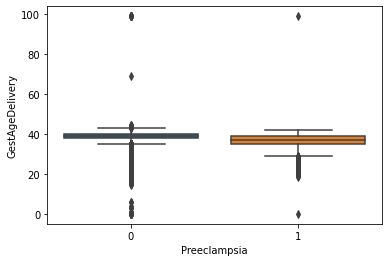

In [163]:
sns.boxplot(x="Preeclampsia",y="GestAgeDelivery", data=momi)

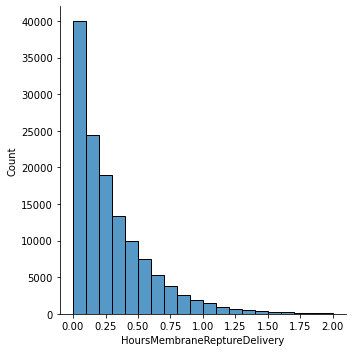

In [194]:
sns.displot(momi[momi['HoursMembraneReptureDelivery']<2], x="HoursMembraneReptureDelivery", bins=20)

In [191]:
momi['HoursMembraneReptureDelivery'].describe()

count    133829.000000
mean          0.389859
std           1.713367
min           0.000000
25%           0.072917
50%           0.211111
75%           0.431944
max          96.043056
Name: HoursMembraneReptureDelivery, dtype: float64

## Alcohol and Smoking

In [274]:
momi['Smoke_a'].value_counts()

0.0    87719
1.0    15018
Name: Smoke_a, dtype: int64

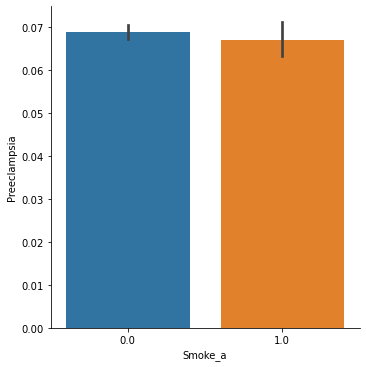

In [276]:
#https://seaborn.pydata.org/generated/seaborn.barplot.html
# Shows measure of central tendancy, slightly higher chance of preeclampsia if not smoke
sns.catplot(data=momi, x='Smoke_a',y='Preeclampsia', kind='bar')

In [ ]:
'NumCig3MoPriorToPreg_State',
 'NumCigFirstTri_State',
 'NumCigSecondTri_State',
 'NumCigThirdTri_State',

<AxesSubplot:xlabel='Preeclampsia', ylabel='NumCig3MoPriorToPreg_State'>

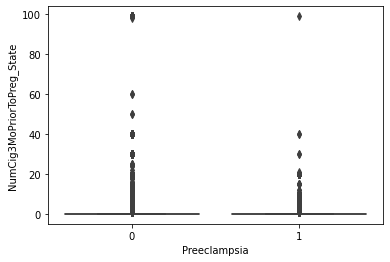

In [292]:
sns.boxplot(data=momi, x='Preeclampsia', y='NumCig3MoPriorToPreg_State')

In [294]:
momi['NumCig3MoPriorToPreg_State'].describe()

count    90025.000000
mean         1.144471
std          3.957105
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         99.000000
Name: NumCig3MoPriorToPreg_State, dtype: float64

In [296]:
momi['NumCig3MoPriorToPreg_State'].value_counts().sort_index()

0.0     78023
1.0       368
2.0       970
3.0      1146
4.0       774
5.0      1599
6.0       540
7.0       317
8.0       356
9.0        21
10.0     4321
11.0        6
12.0       49
13.0        9
15.0      133
16.0        2
18.0        7
20.0     1250
21.0        1
22.0        1
24.0        2
25.0        3
30.0       57
40.0       35
50.0        2
60.0        2
98.0        1
99.0       30
Name: NumCig3MoPriorToPreg_State, dtype: int64

<AxesSubplot:xlabel='Preeclampsia', ylabel='NumCigFirstTri_State'>

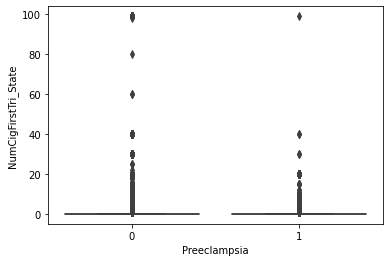

In [293]:
sns.boxplot(data=momi, x='Preeclampsia', y='NumCigFirstTri_State')

In [297]:
momi['NumCigFirstTri_State'].value_counts().sort_index()

0.0     78224
1.0       398
2.0       998
3.0      1150
4.0       754
5.0      1611
6.0       512
7.0       320
8.0       353
9.0        20
10.0     4250
11.0        6
12.0       44
13.0        9
15.0      126
16.0        2
18.0        6
20.0     1132
22.0        1
25.0        2
30.0       45
40.0       29
60.0        2
80.0        1
98.0        1
99.0       29
Name: NumCigFirstTri_State, dtype: int64

In [298]:
momi['NumCigSecondTri_State'].value_counts().sort_index()

0.0     78867
1.0       359
2.0       913
3.0      1033
4.0       751
5.0      1523
6.0       510
7.0       300
8.0       361
9.0        24
10.0     4038
11.0        7
12.0       46
13.0        9
15.0      126
16.0        2
18.0        6
20.0     1049
22.0        1
25.0        2
30.0       37
40.0       23
60.0        1
98.0        1
99.0       29
Name: NumCigSecondTri_State, dtype: int64

In [299]:
momi['NumCigThirdTri_State'].value_counts().sort_index()

0.0     78928
1.0       382
2.0       938
3.0      1051
4.0       725
5.0      1527
6.0       486
7.0       294
8.0       351
9.0        23
10.0     3999
11.0        6
12.0       44
13.0        9
15.0      122
16.0        2
18.0        6
19.0        1
20.0     1030
22.0        2
25.0        2
30.0       36
40.0       22
60.0        1
98.0        1
99.0       29
Name: NumCigThirdTri_State, dtype: int64

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

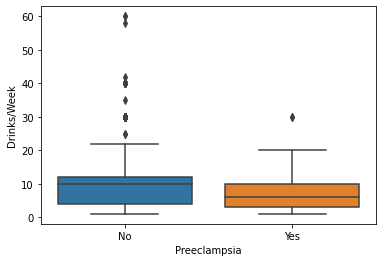

In [60]:
sns.boxplot(data=momi.loc[momi['Drinks/Week'] >0], x='Preeclampsia', y='Drinks/Week').set_xticklabels(['No','Yes'])

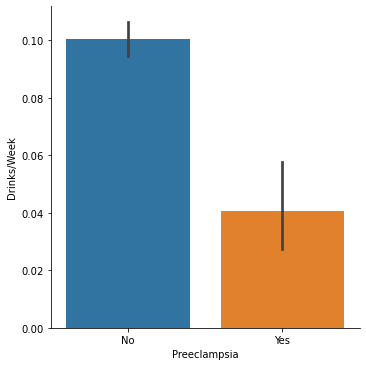

In [63]:
# I have done something strange here
sns.catplot(data=momi, y='Drinks/Week',x='Preeclampsia', kind='bar').set_xticklabels(['No','Yes'])

Maybe not? A link to a paper describing possible protective effects of alcohol
https://www.liebertpub.com/doi/10.1089/jwh.1996.5.225

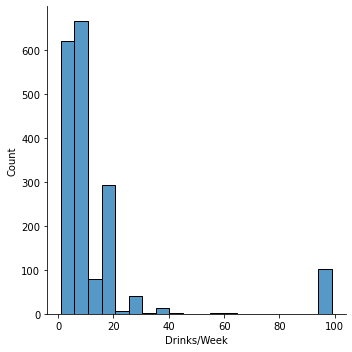

In [58]:
# This is specifically for people who had more than 0 drinks a week
sns.displot(momi[momi['Drinks/Week']>0], x="Drinks/Week", bins=20)

In [291]:
# I'm unsure if 99 is missing or an accurate estimate.
momi['Drinks/Week'].value_counts().sort_index()

0.0     174585
1.0        145
2.0        131
3.0        107
4.0         81
5.0        156
6.0         73
7.0         66
8.0         38
9.0          6
10.0       483
11.0         5
12.0         9
13.0         2
14.0         1
15.0        62
16.0         1
17.0         4
20.0       288
21.0         3
22.0         2
25.0         2
30.0        41
35.0         1
40.0        14
42.0         1
58.0         1
60.0         2
99.0       103
Name: Drinks/Week, dtype: int64

In [59]:
momi['Drinks/Week'] = np.where(momi['Drinks/Week'] == 99, np.NaN, momi['Drinks/Week'])

In [279]:
momi['Drinks/Week'].describe()

count    176413.000000
mean          0.154728
std           2.692152
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          99.000000
Name: Alcohol_a, dtype: float64

In [178]:
list(momi.columns)

['MOMI_ID',
 'Delivery_Number_Per_Mother',
 'DeliveryYear',
 'Has_Prenatal_Data',
 'Has_Ultrasound_PlacLoc',
 'MotherAge',
 'FatherAge',
 'MomEducation_State',
 'DadEducation_State',
 'NumCig3MoPriorToPreg_State',
 'NumCigFirstTri_State',
 'NumCigSecondTri_State',
 'NumCigThirdTri_State',
 'Smoke_a',
 'Smoke_b',
 'Alcohol_a',
 'Race',
 'Ethnicity',
 'Insurance',
 'GestAgeDelivery',
 'TotalNumPregnancies',
 'DeliveriesPriorAdmission',
 'TotalAbortions',
 'Primagrivada',
 'MaternalHeightMeters',
 'PrePregWeight',
 'WeightAtAdmission',
 'HoursLaborToDelivery',
 'HoursMembraneReptureDelivery',
 'RepeatCesarean',
 'DeliveryMethod',
 'OutcomeOfDelivery',
 'SINGLETON',
 'FetalDeath',
 'MaternalNeuromuscularDisease',
 'MCollagenVascularDisease',
 'MStructuralHeartDiseas',
 'ChronicHypertension',
 'PregRelatedHypertension',
 'Gest_HTN',
 'Mild_PE',
 'Severe_PE',
 'SIPE',
 'Unspecified_HTN',
 'MPostPartumComplications',
 'Depression',
 'DiabetesMellitus',
 'ThyroidDisease',
 'HyperemesisGravidar

In [204]:
momi['DeliveryMethod'].value_counts()

1    169097
2     60397
Name: DeliveryMethod, dtype: int64

In [136]:
momi['Alcohol_a'].isnull().sum()

53081

In [300]:
momi['MPostPartumComplications'].value_counts()

0    215136
3     11233
1      1647
4      1237
5       199
2        42
Name: MPostPartumComplications, dtype: int64

## Prenatal Information

This is looking at specifically the mothers with prenatal information

In [49]:
momi.columns

Index(['MOMI_ID', 'Delivery_Number_Per_Mother', 'DeliveryYear',
       'Has_Prenatal_Data', 'Has_Ultrasound_PlacLoc', 'MotherAge', 'FatherAge',
       'MomEducation_State', 'DadEducation_State',
       'NumCig3MoPriorToPreg_State',
       ...
       'NICULOS', 'InfantWeightGrams', 'GestWeightCompare', 'CNSAbnormality',
       'CongenitalSyphilis', 'UTI', 'PNV_Total_Number', 'VisitsBefore20Weeks',
       'VisitsAfter20Weeks', 'Preeclampsia'],
      dtype='object', length=101)

<AxesSubplot:xlabel='Preeclampsia', ylabel='VisitsBefore20Weeks'>

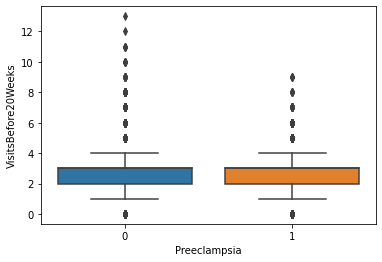

In [50]:
sns.boxplot(x='Preeclampsia', y='VisitsBefore20Weeks', data= momi.loc[momi['Has_Prenatal_Data'] == 1])

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

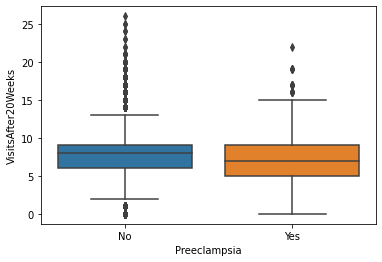

In [64]:
sns.boxplot(x='Preeclampsia', y='VisitsAfter20Weeks', data=momi.loc[momi['Has_Prenatal_Data'] == 1]).set_xticklabels(['No','Yes'])

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

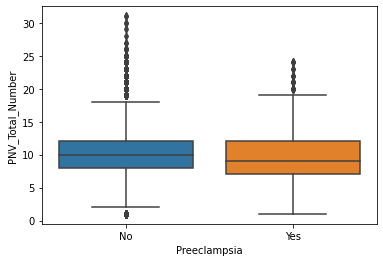

In [55]:
# Not super informative since most don't have prenatal visits. How look at distribution in just those? 
sns.boxplot(x="Preeclampsia", y="PNV_Total_Number", data=momi.loc[momi['Has_Prenatal_Data'] == 1]).set_xticklabels(['No','Yes'])


### Prenatal Unique Information

In [76]:
prenatal.shape

(456757, 12)

There are 39,092 unique moms in the prenatal dataset

In [84]:
prenatal['MOMI_ID'].unique().shape

(39092,)

In [88]:
uniqueMoms['Has_Prenatal_Data'].sum()

26909

In [89]:
momi['Has_Prenatal_Data'].sum()

45637

In [94]:
uniquePre = prenatal.drop_duplicates(subset=['MOMI_ID'])

In [95]:
uniquePre.shape

(39092, 12)

In [99]:
# There are 114,895 moms in the momi dataset that are not in the prenatal
len(list(set(momi.MOMI_ID)-set(prenatal.MOMI_ID)))

114895

In [100]:
# And none that are in the prenatal dataset that are not in the momi
len(list(set(prenatal.MOMI_ID)-set(momi.MOMI_ID)))

0

## Ultrasound Exploration

In [229]:
ultrasound.columns

Index(['MOMI_ID', 'DeliveryYear', 'Delivery_Number_Per_Mother', 'DELWKSGT',
       'MMULGSTD', 'SINGLETON', 'USExamCategory', 'USExamType', 'USGestAge',
       'USGestAgeType', 'FetusNumber', 'USPlacLoc_1', 'USPlacLoc_2',
       'USPlacLoc_3', 'USPlacLoc_4', 'USPlacLoc_5', 'USPlacLoc_6'],
      dtype='object')

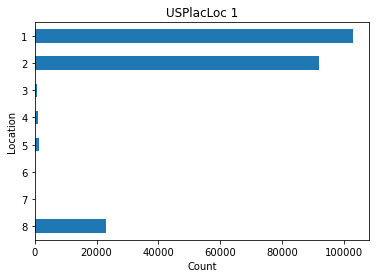

In [249]:
ax=ultrasound['USPlacLoc_1'].value_counts().sort_index(ascending=False).plot(kind = 'barh')
ax.set(xlabel='Count',ylabel='Location', title='USPlacLoc 1')
plt.show()

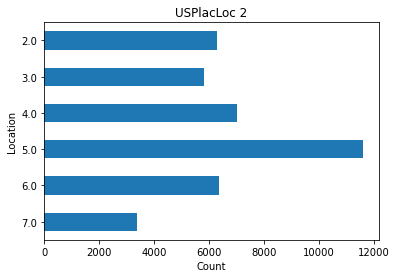

In [251]:
ax=ultrasound['USPlacLoc_2'].value_counts().sort_index(ascending=False).plot(kind = 'barh')
ax.set(xlabel='Count',ylabel='Location', title='USPlacLoc 2')
plt.show()

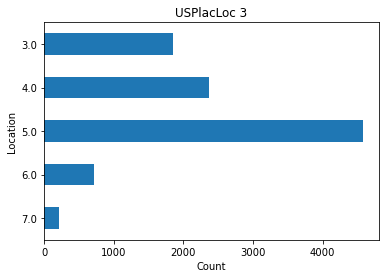

In [252]:
ax=ultrasound['USPlacLoc_3'].value_counts().sort_index(ascending=False).plot(kind = 'barh')
ax.set(xlabel='Count',ylabel='Location', title='USPlacLoc 3')
plt.show()

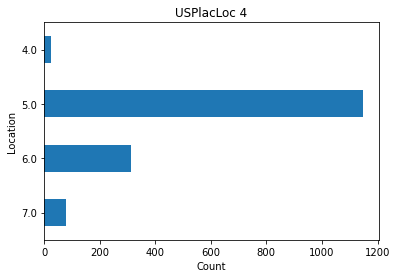

In [246]:
ax=ultrasound['USPlacLoc_4'].value_counts().sort_index(ascending=False).plot(kind = 'barh')
ax.set(xlabel='Count',ylabel='Location', title='USPlacLoc 4')
plt.show()

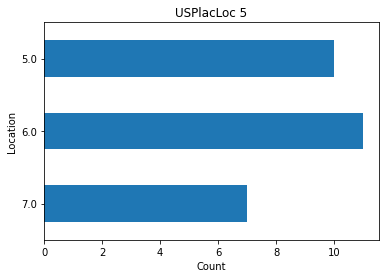

In [253]:
ax=ultrasound['USPlacLoc_5'].value_counts().sort_index(ascending=False).plot(kind = 'barh')
ax.set(xlabel='Count',ylabel='Location', title='USPlacLoc 5')
plt.show()

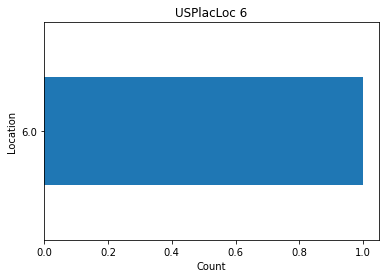

In [254]:
ax=ultrasound['USPlacLoc_6'].value_counts().sort_index(ascending=False).plot(kind = 'barh')
ax.set(xlabel='Count',ylabel='Location', title='USPlacLoc 6')
plt.show()

In [255]:
ultrasound['USPlacLoc_6'].value_counts()

6.0    1
Name: USPlacLoc_6, dtype: int64

In [265]:
ultrasound[ultrasound['USPlacLoc_6'].notnull()]

,MOMI_ID,DeliveryYear,Delivery_Number_Per_Mother,DELWKSGT,MMULGSTD,SINGLETON,USExamCategory,USExamType,USGestAge,USGestAgeType,FetusNumber,USPlacLoc_1,USPlacLoc_2,USPlacLoc_3,USPlacLoc_4,USPlacLoc_5,USPlacLoc_6
39568,96434374991986,2011,1,38.0,10,1,Obstetric,FirstTrimester,11.7,LMP,1,1,2.0,3.0,4.0,5.0,6.0


In [269]:
ultrasound.dropna(subset=['USPlacLoc_4', 'USPlacLoc_5'])

,MOMI_ID,DeliveryYear,Delivery_Number_Per_Mother,DELWKSGT,MMULGSTD,SINGLETON,USExamCategory,USExamType,USGestAge,USGestAgeType,FetusNumber,USPlacLoc_1,USPlacLoc_2,USPlacLoc_3,USPlacLoc_4,USPlacLoc_5,USPlacLoc_6
2245,45825621991978,2016,1,39.000000,10,1,Obstetric,BiophysicalProfile,34.0,LMP,1,1,2.0,3.0,4.0,5.0,NaN
4568,15241235991979,2012,1,37.000000,10,1,Obstetric,Limited,37.4,Conception,1,1,2.0,3.0,4.0,5.0,NaN
12103,55673896991970,2014,1,36.000000,2,0,Obstetric,Limited,17.6,Conception,1,1,2.0,4.0,5.0,7.0,NaN
12104,55673896991970,2014,1,36.000000,2,0,Obstetric,Limited,17.6,Conception,2,1,2.0,4.0,5.0,7.0,NaN
20453,49116361991986,2019,1,40.571429,10,1,Obstetric,FollowUp,28.1,PriorExam,1,1,2.0,3.0,4.0,5.0,NaN
26489,13439583991987,2019,1,36.142857,10,1,Obstetric,Limited,28.0,LMP,1,1,2.0,3.0,5.0,6.0,NaN
33888,78861149991975,2011,1,41.000000,10,1,Obstetric,Complete,18.1,LMP,1,1,3.0,4.0,5.0,7.0,NaN
39568,96434374991986,2011,1,38.000000,10,1,Obstetric,FirstTrimester,11.7,LMP,1,1,2.0,3.0,4.0,5.0,6.0
48478,52376185991981,2016,1,38.857143,10,1,Obstetric,Limited,16.3,LMP,1,1,2.0,3.0,4.0,7.0,NaN
67513,85953713991989,2013,1,25.000000,10,1,Obstetric,FirstTrimester,11.8,Crown Rump,1,1,2.0,4.0,5.0,7.0,NaN


In [272]:
ultrasound.dropna(subset=['USPlacLoc_4'])

,MOMI_ID,DeliveryYear,Delivery_Number_Per_Mother,DELWKSGT,MMULGSTD,SINGLETON,USExamCategory,USExamType,USGestAge,USGestAgeType,FetusNumber,USPlacLoc_1,USPlacLoc_2,USPlacLoc_3,USPlacLoc_4,USPlacLoc_5,USPlacLoc_6
137,91541654991981,2019,1,38.000000,10,1,Obstetric,BiophysicalProfile,33.1,LMP,1,1,2.0,4.0,5.0,NaN,NaN
160,43522444991979,2014,3,38.000000,2,0,Obstetric,Complete,20.4,LMP,2,1,2.0,3.0,5.0,NaN,NaN
372,87525636991985,2019,2,39.000000,10,1,Obstetric,Limited,37.0,LMP,1,1,2.0,4.0,5.0,NaN,NaN
630,52829216991983,2018,1,39.000000,10,1,Obstetric,BiophysicalProfile,38.7,LMP,1,1,2.0,4.0,5.0,NaN,NaN
805,99394957991988,2012,1,25.000000,10,1,Obstetric,Complete,22.4,LMP,1,1,2.0,3.0,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219565,23179921991990,2020,1,37.428571,10,1,Obstetric,BiophysicalProfile,36.7,LMP,1,1,2.0,3.0,6.0,NaN,NaN
219616,66177954991981,2020,1,39.285714,10,1,Obstetric,Limited,16.6,PriorExam,1,1,2.0,3.0,5.0,NaN,NaN
219783,31697268991994,2020,1,34.142857,10,1,Obstetric,FollowUp,28.1,LMP,1,1,2.0,4.0,5.0,NaN,NaN
220253,94794271991992,2020,1,40.285714,10,1,Obstetric,Limited,39.3,PatientEDC,1,1,2.0,4.0,5.0,NaN,NaN
